In [1]:
import os
import json
import glob
import shutil
from math import dist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import FontProperties

In [2]:
degrees = ['15cm_0mm_0deg', '15cm_25mm_5deg', '15cm_50mm_10deg', '20cm_0mm_0deg', '20cm_25mm_5deg', '20cm_50mm_10deg']

In [6]:
result="../mmpose/k_fold/result/"
figure = "../mmpose/k_fold/figure"

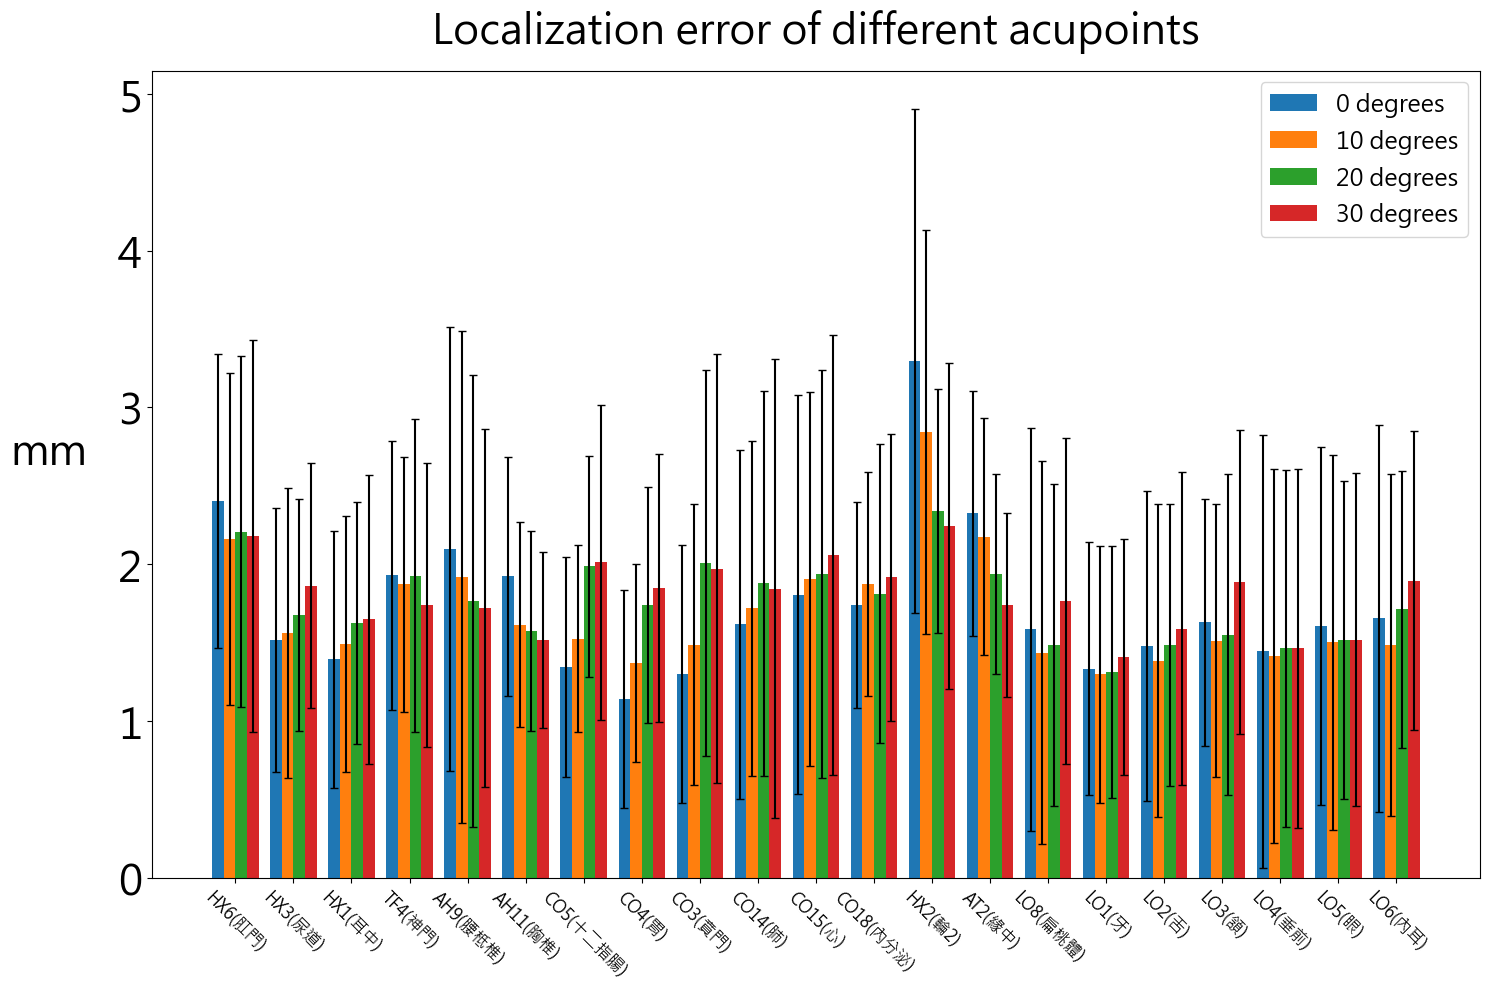

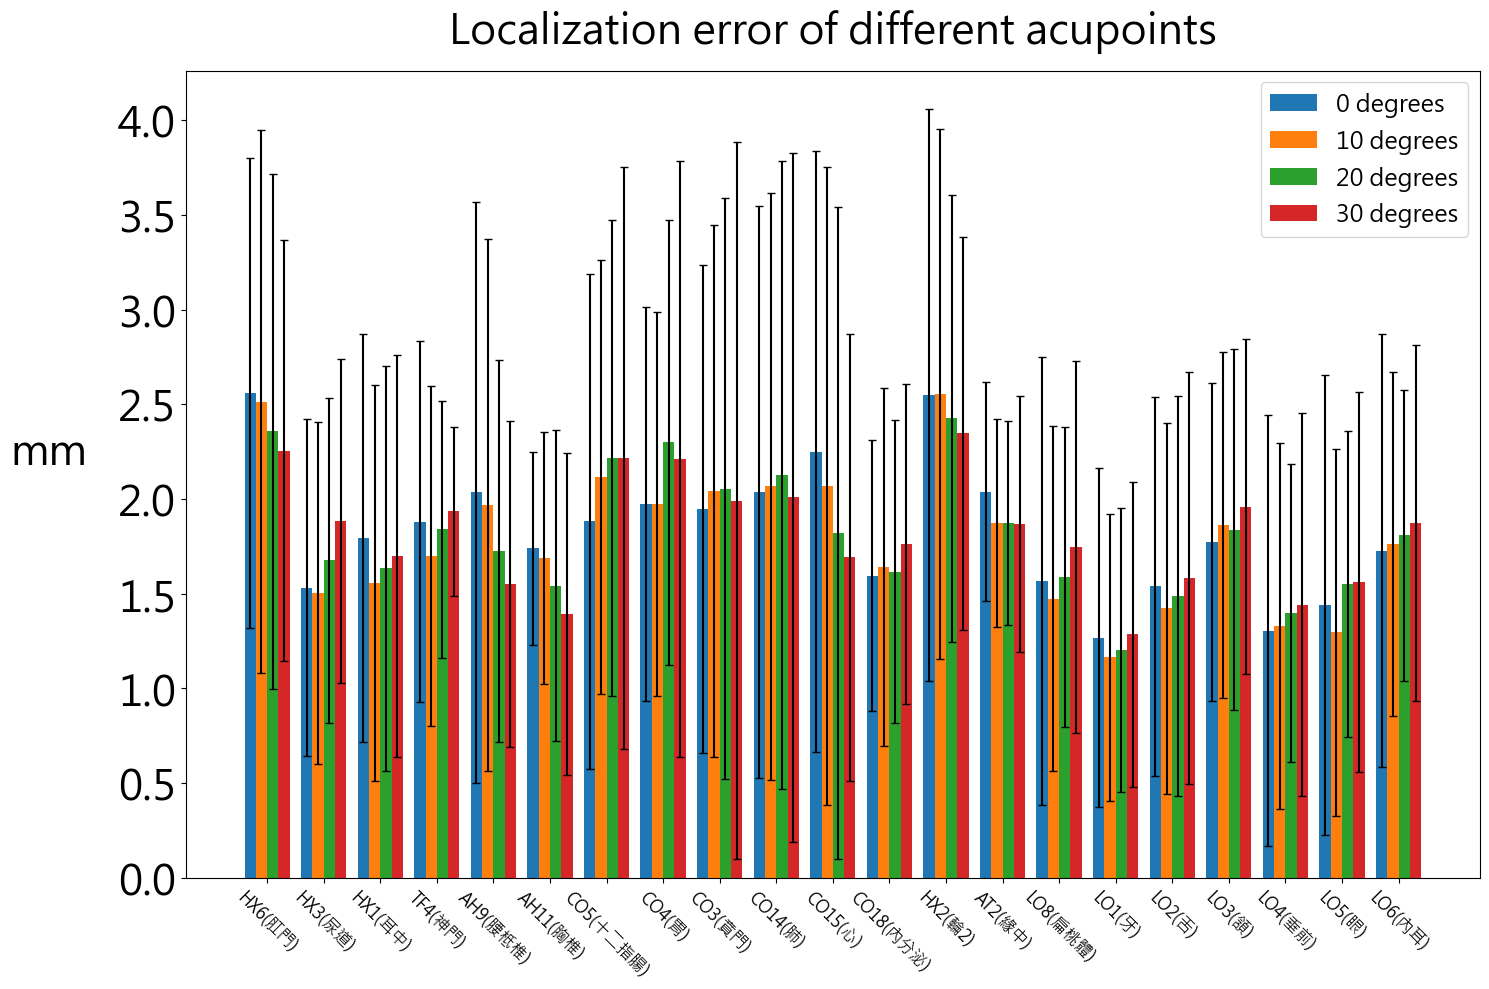

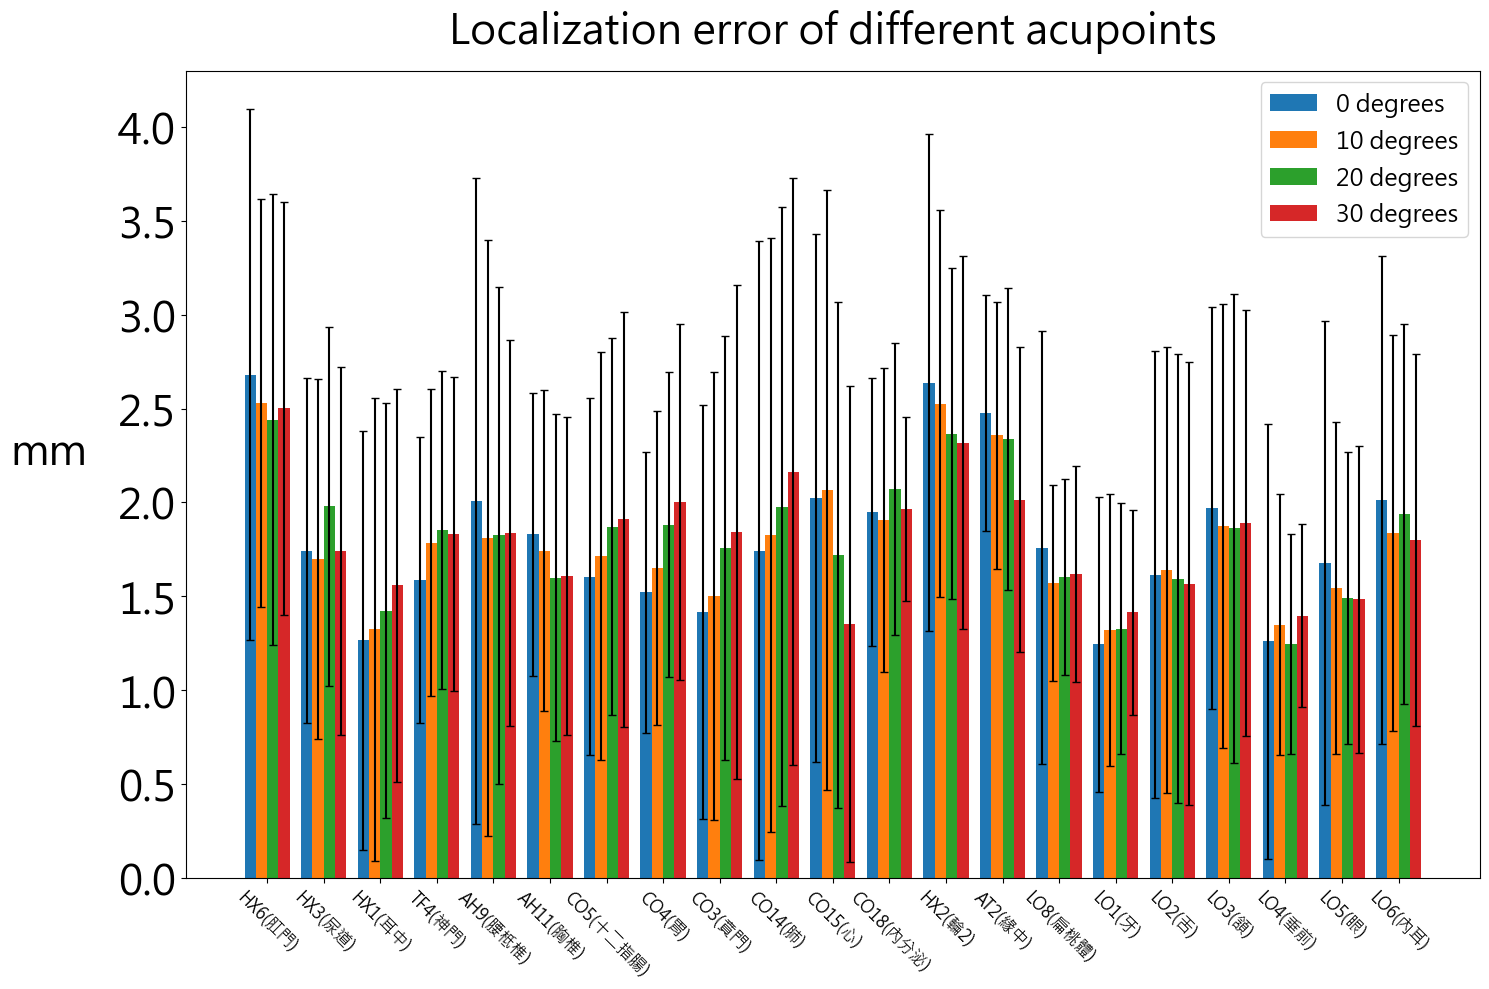

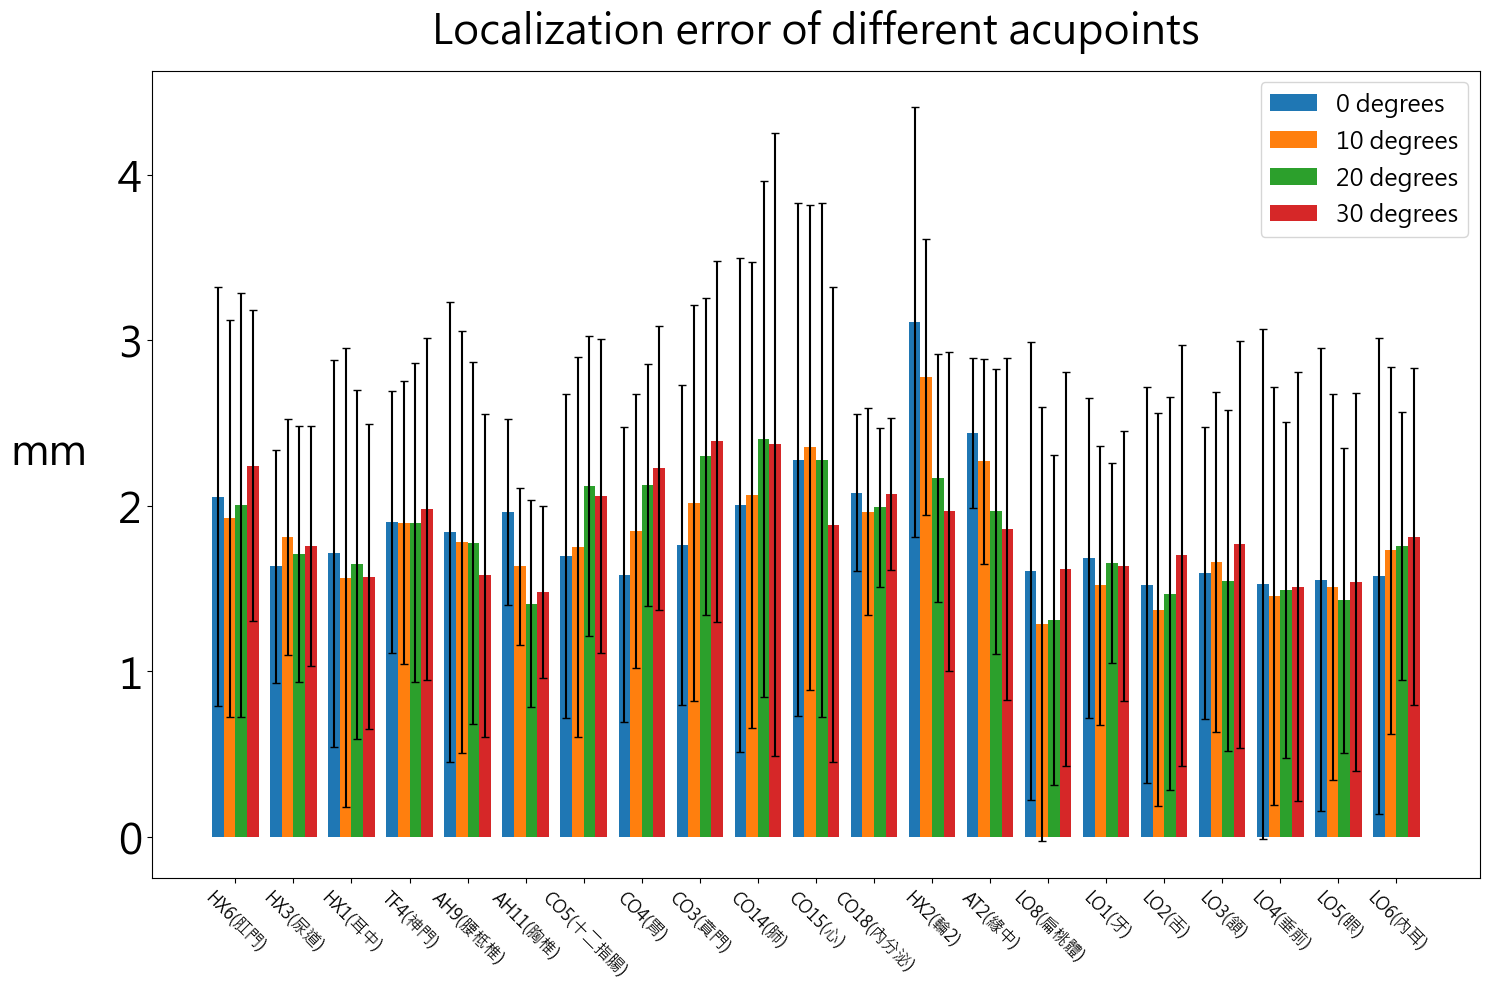

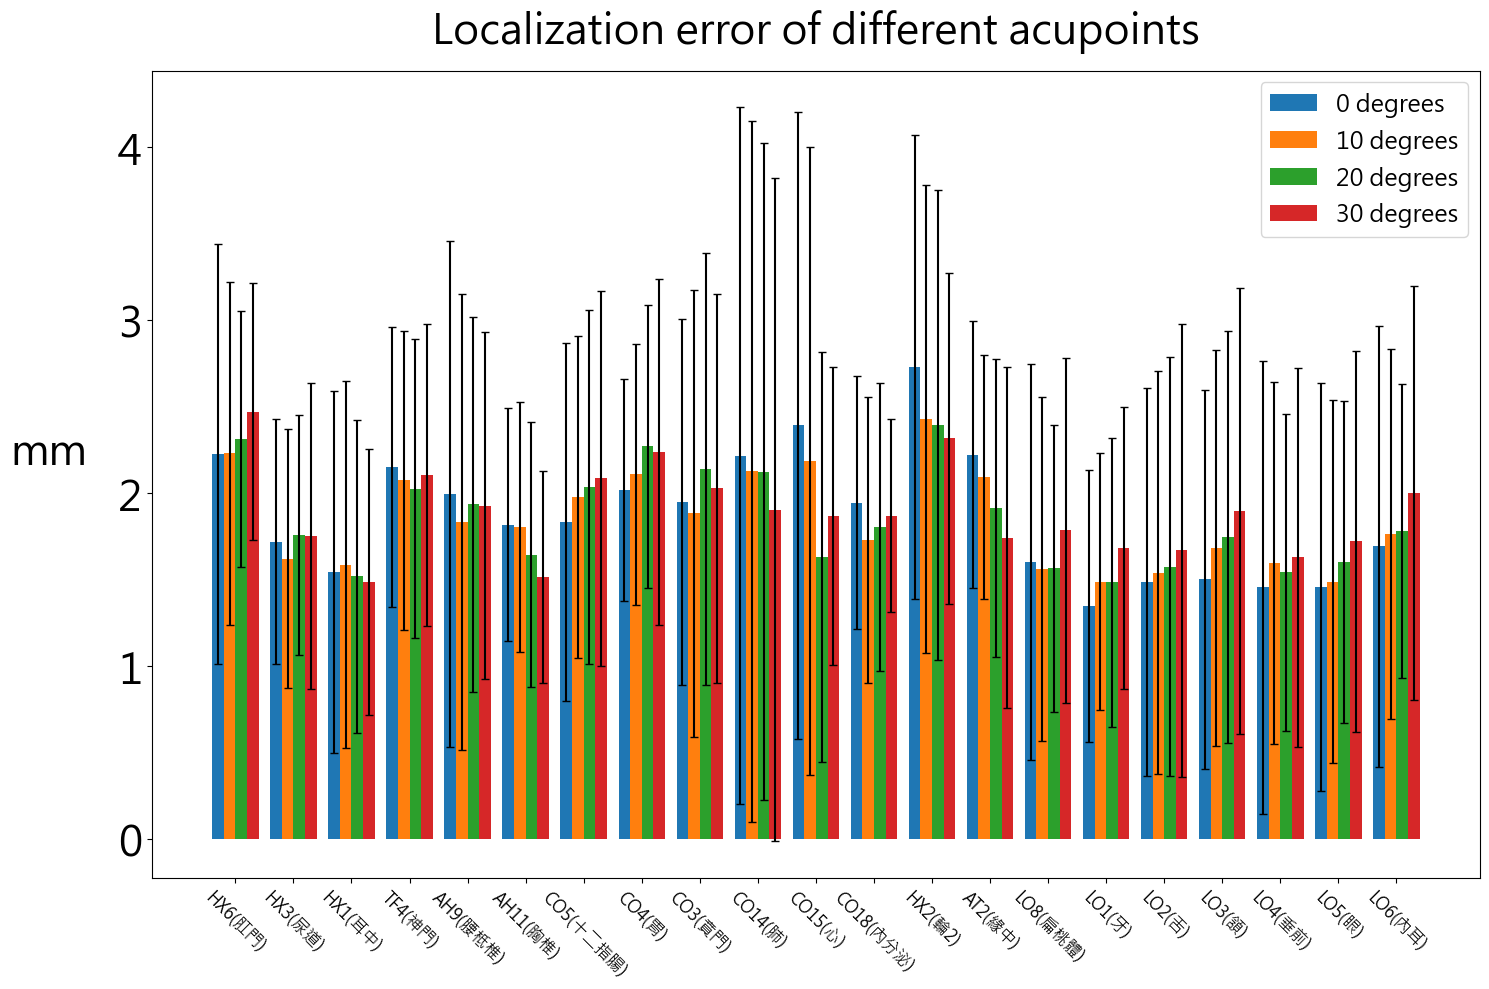

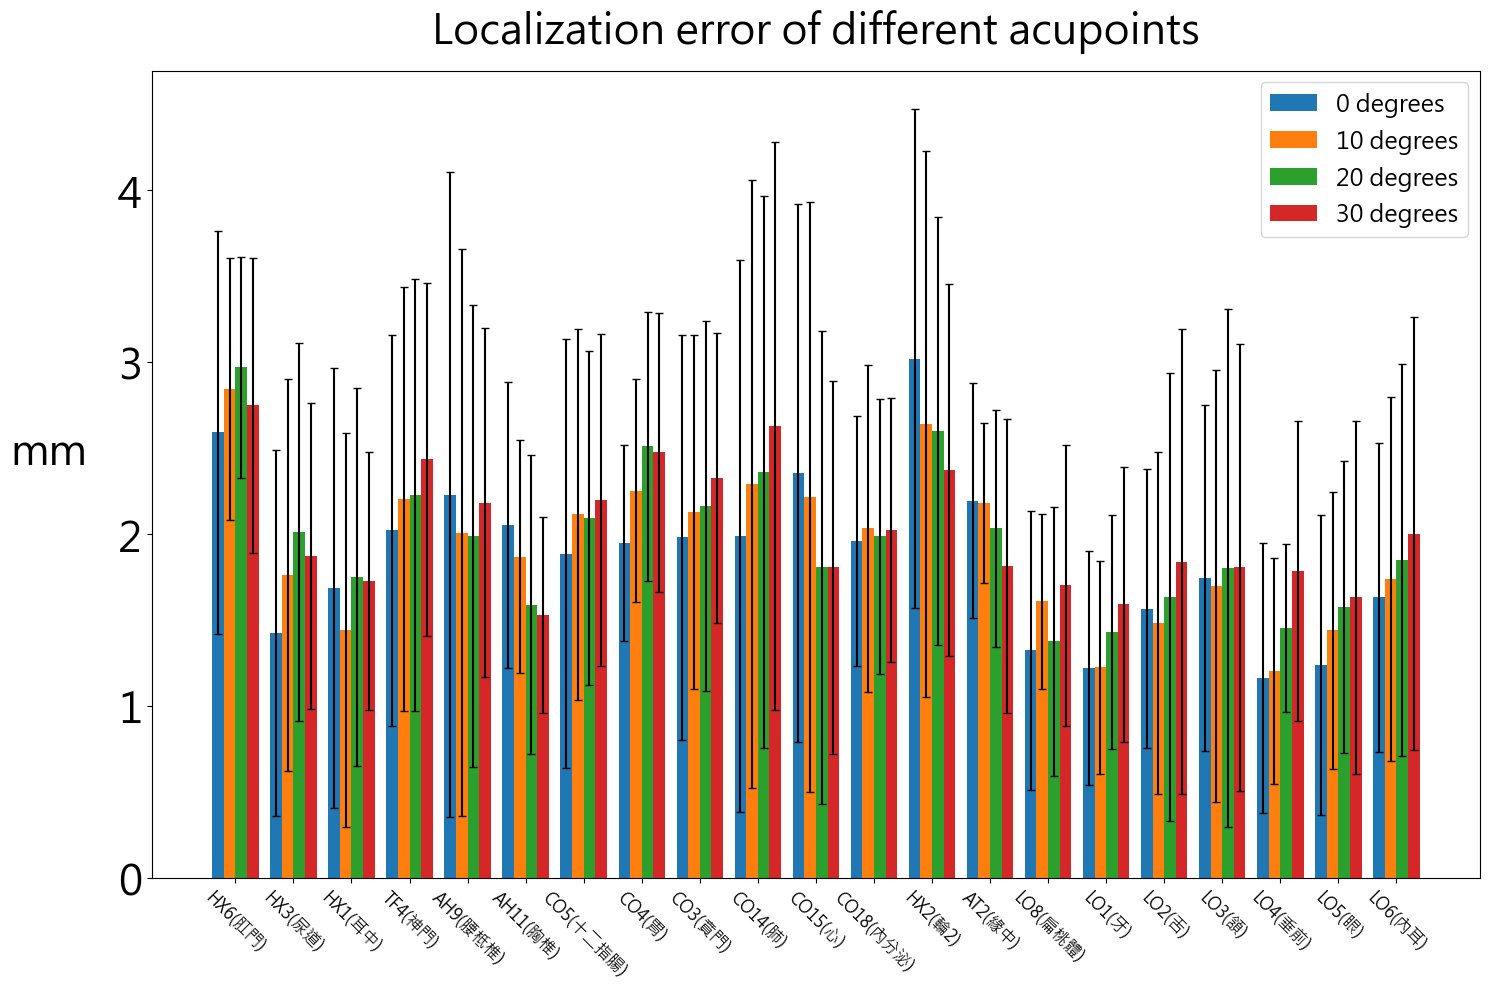

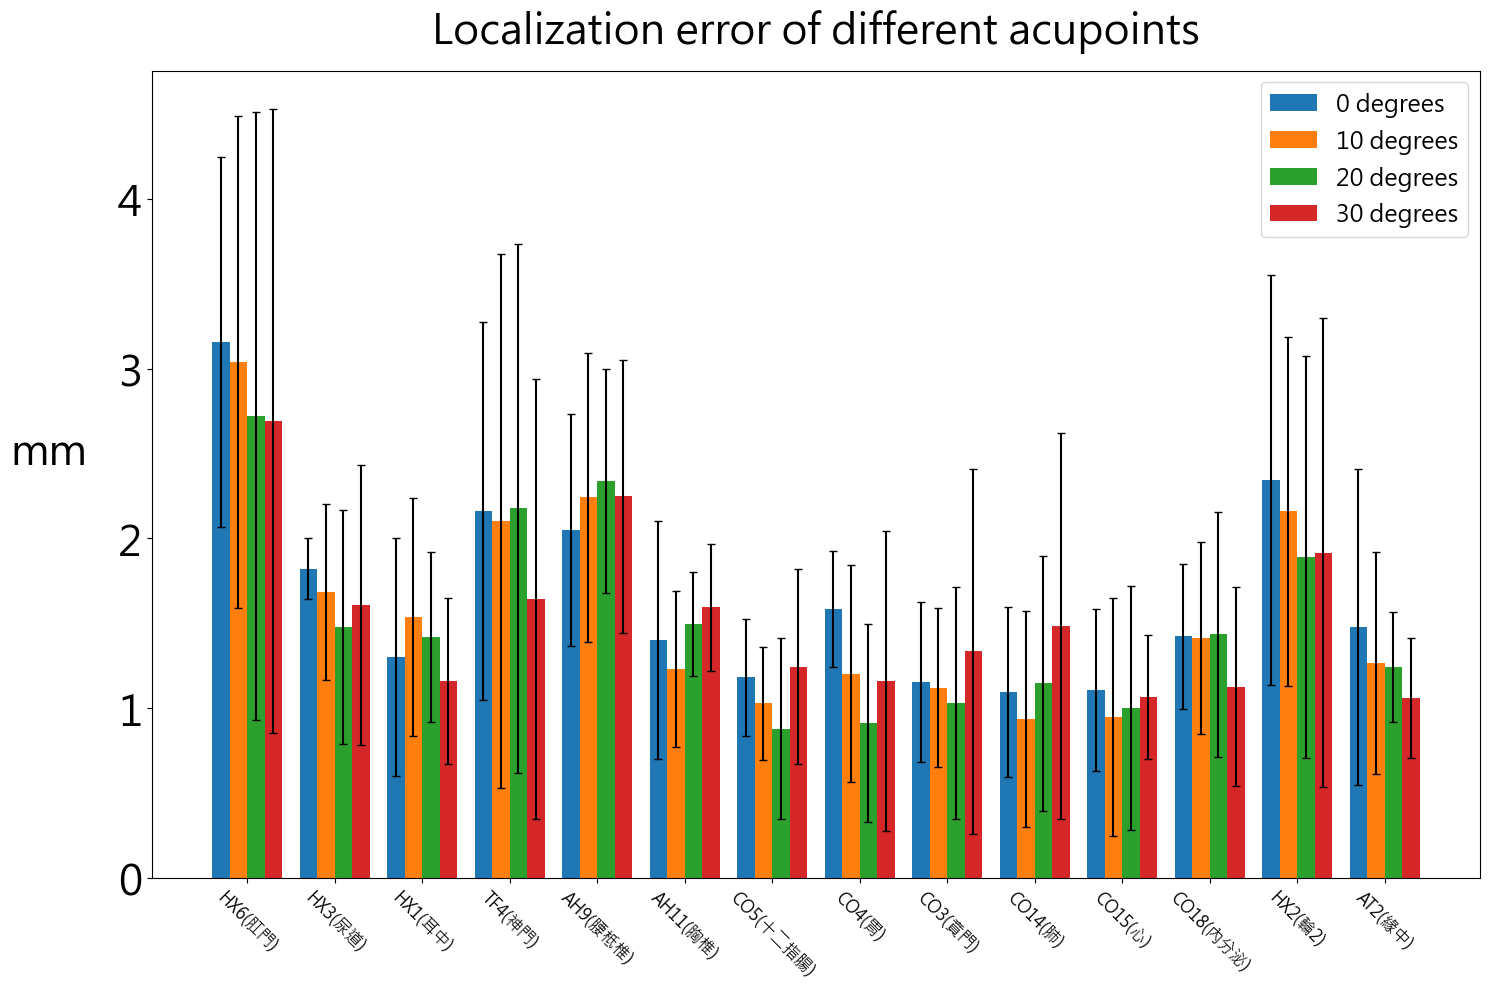

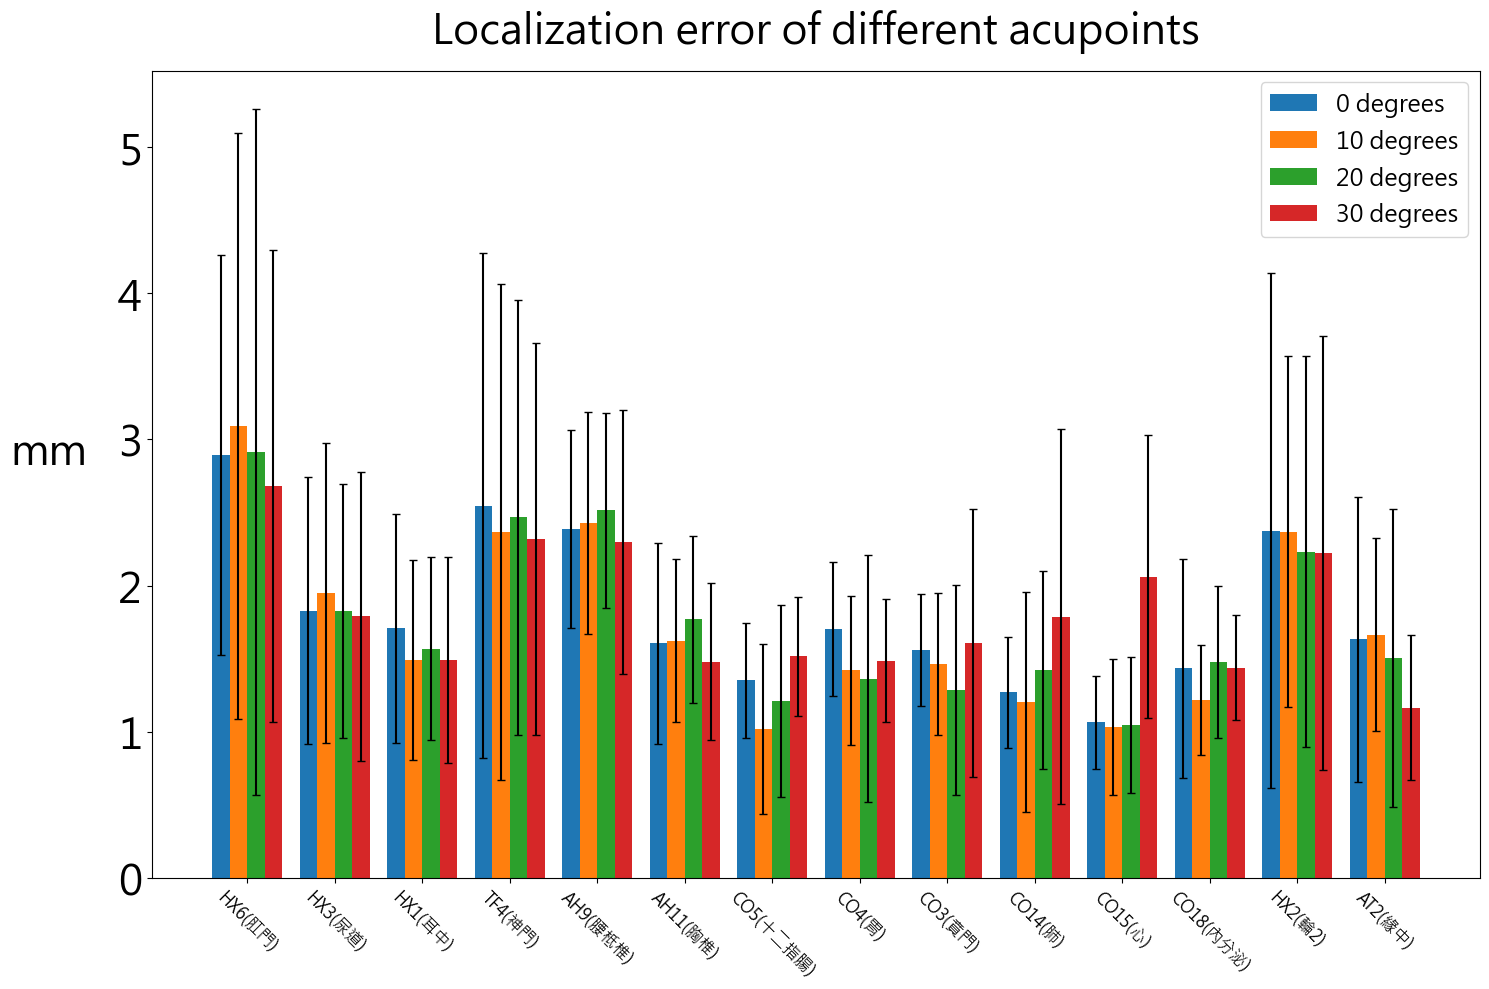

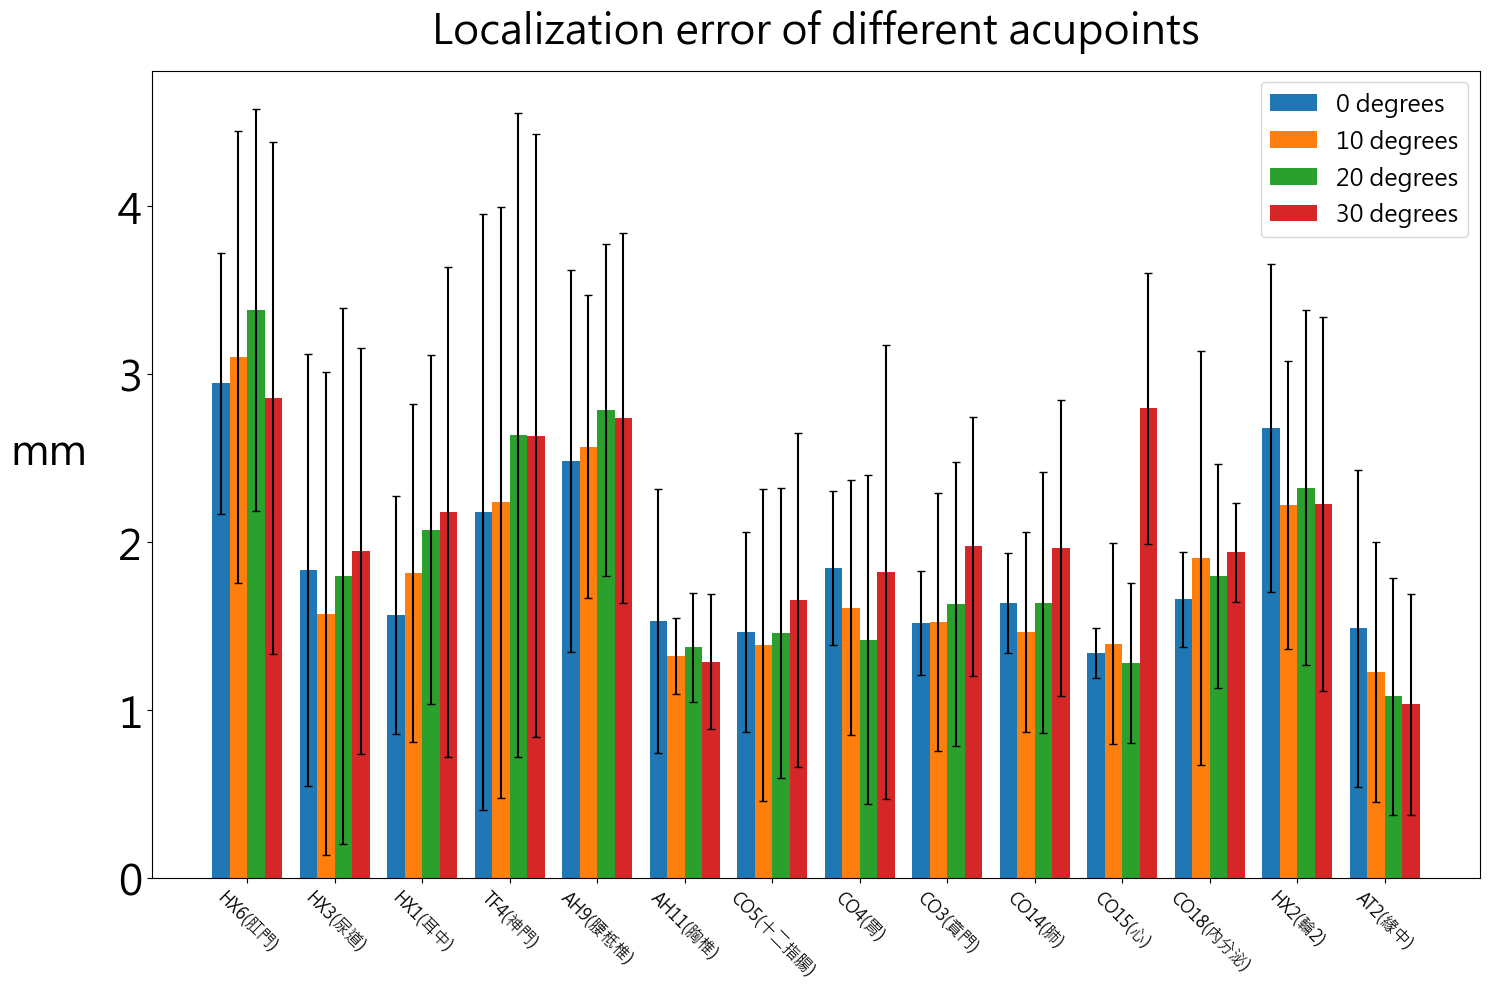

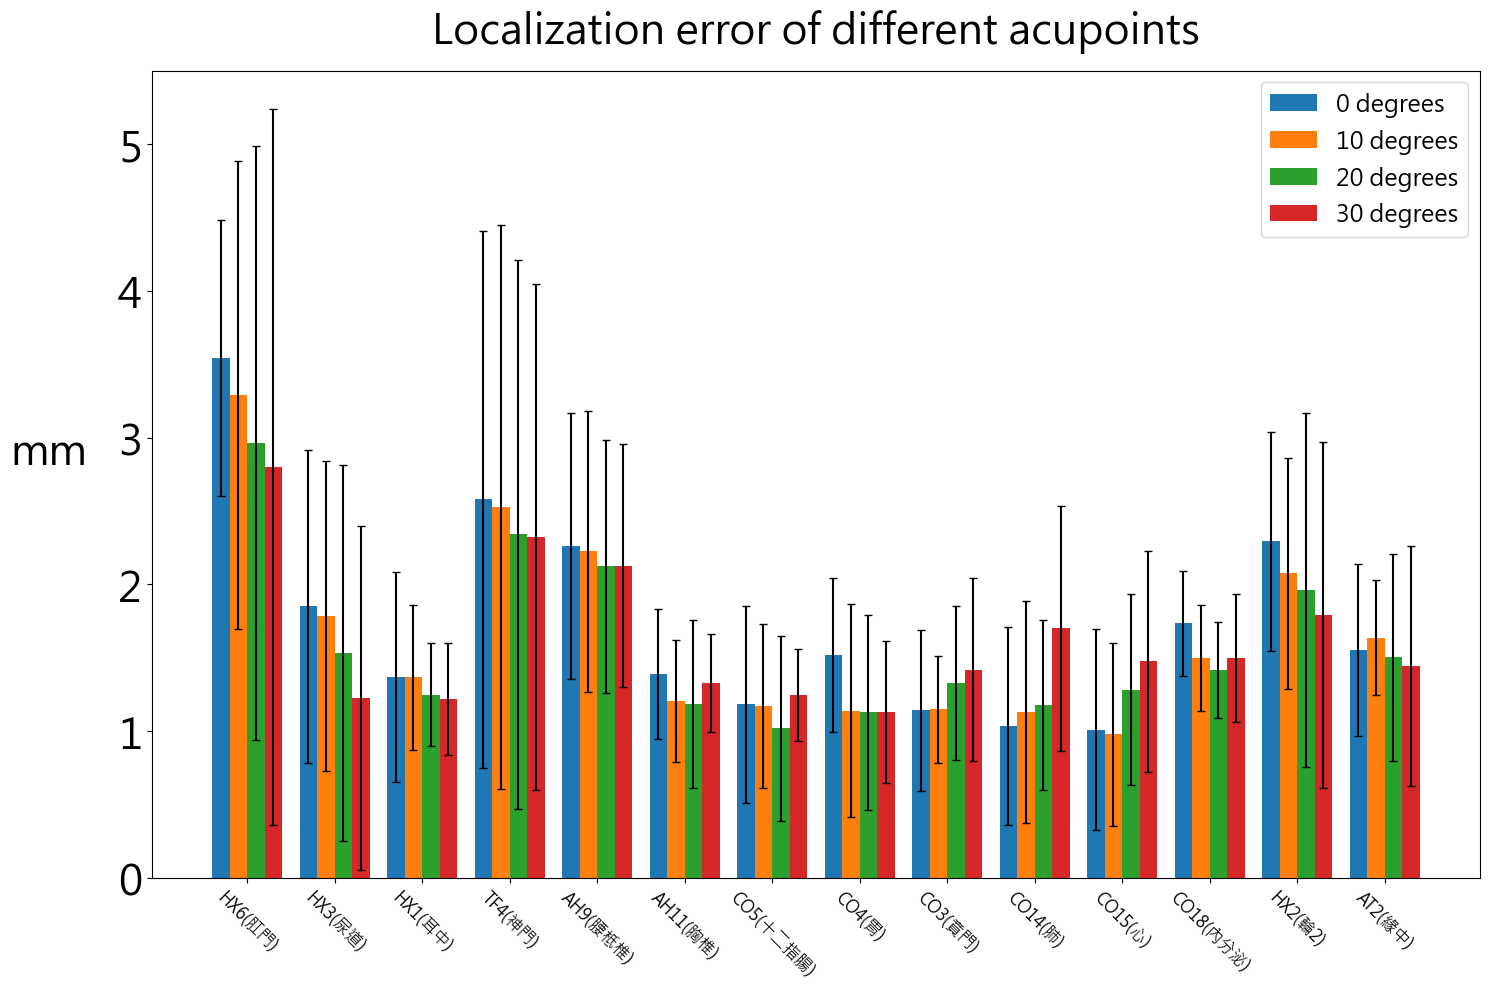

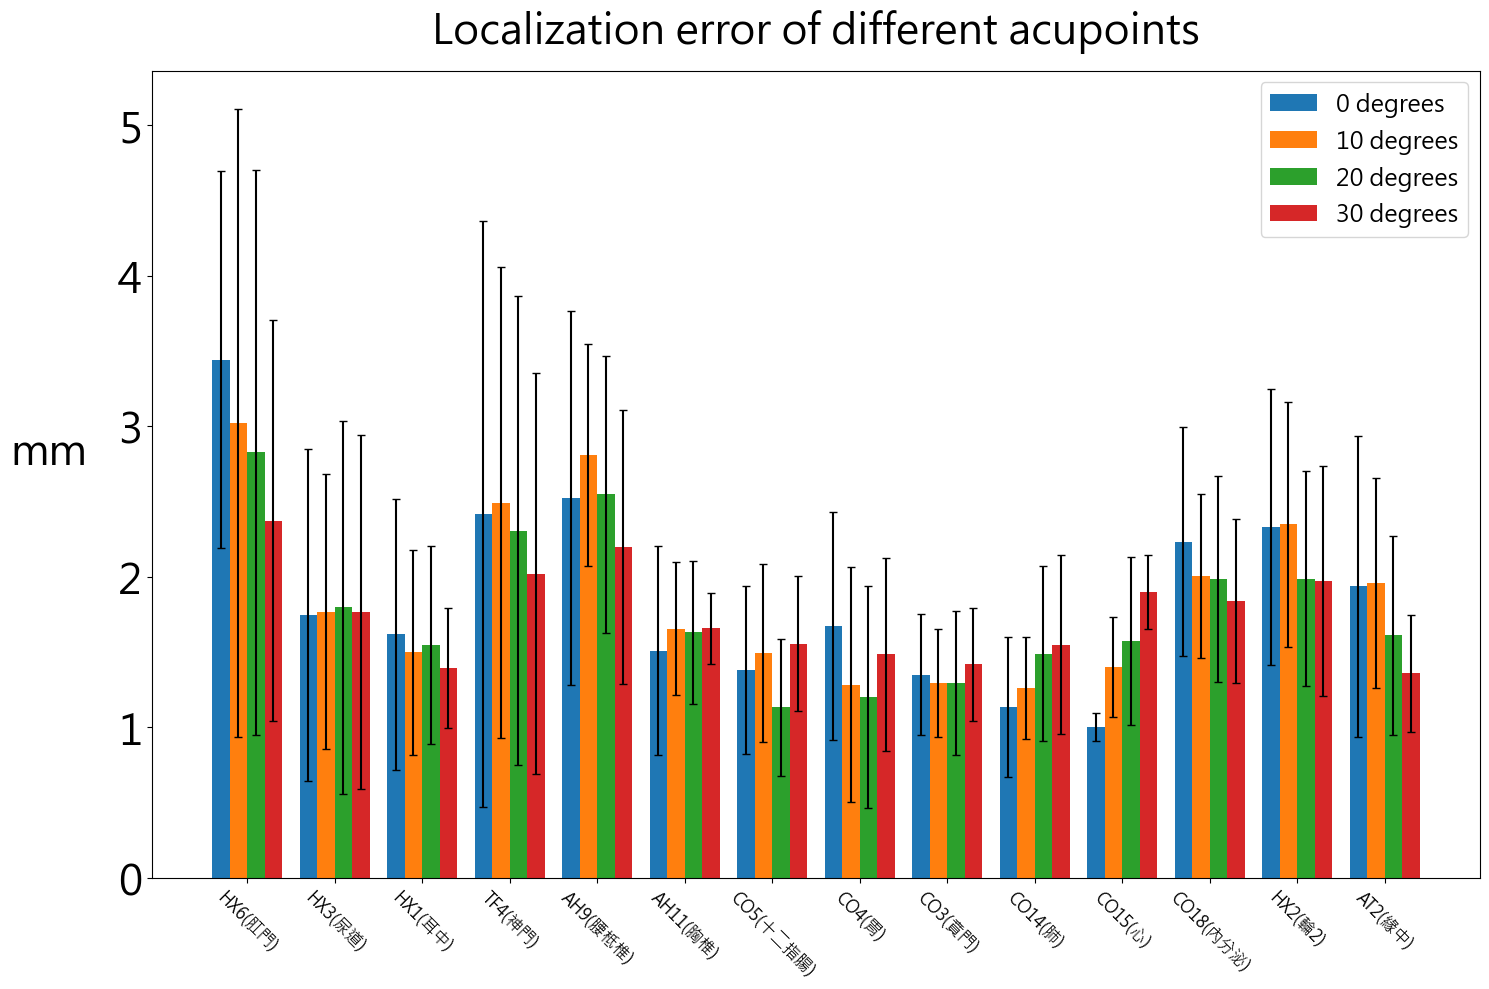

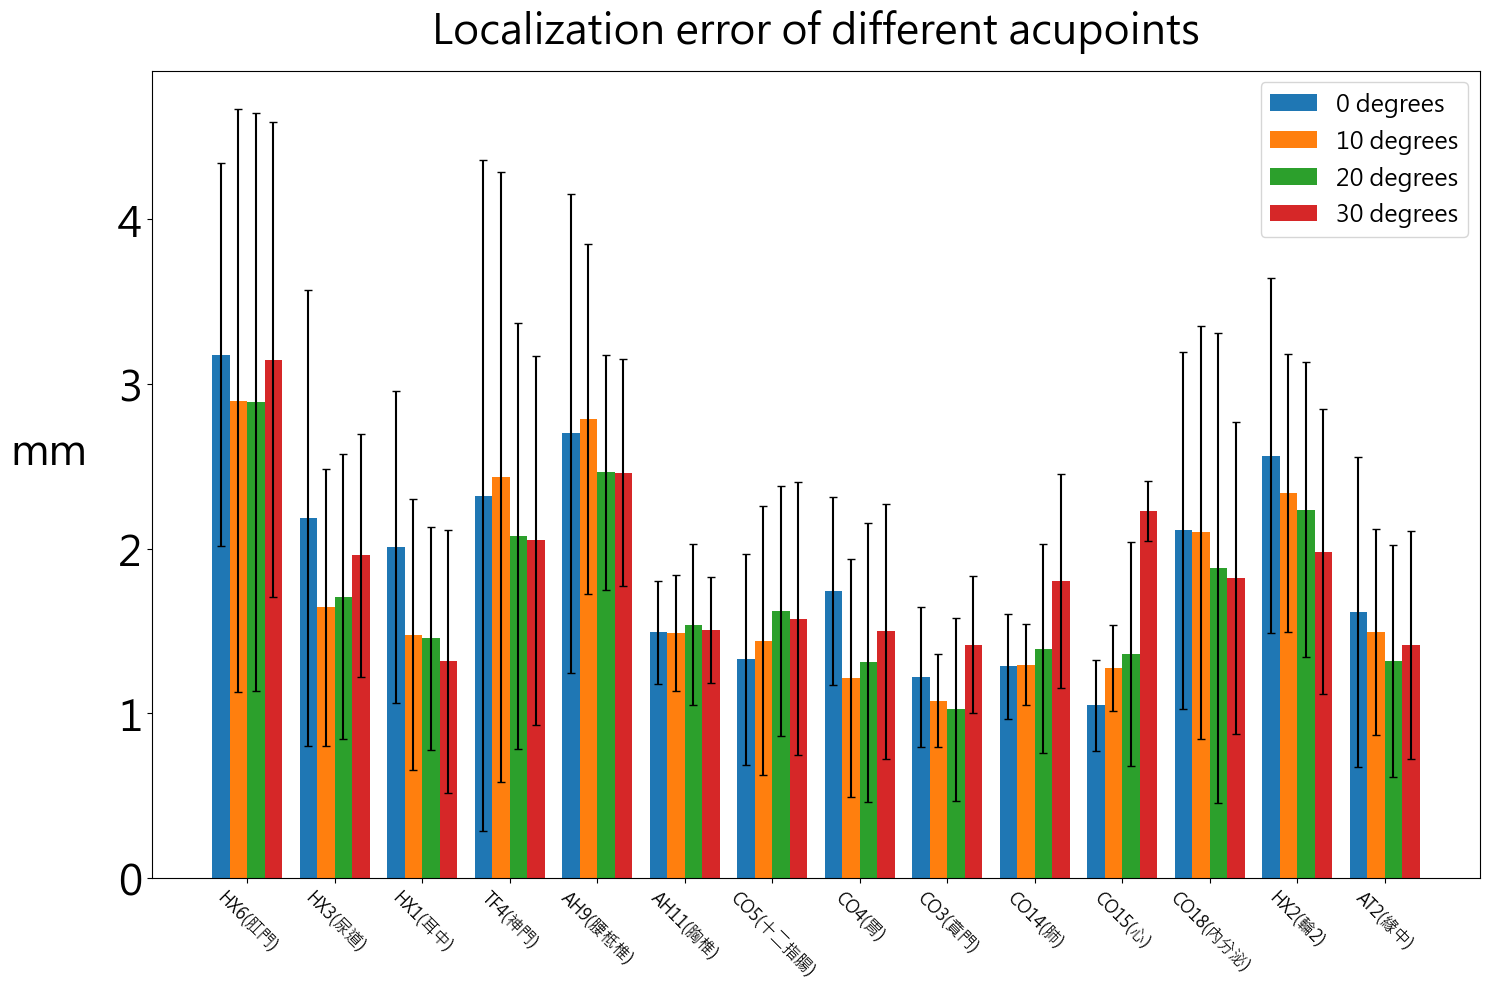

In [8]:
acupoints_name = ["HX6(肛門)", "HX3(尿道)", "HX1(耳中)", "TF4(神門)", "AH9(腰柢椎)", "AH11(胸椎)", "CO5(十二指腸)", "CO4(胃)", "CO3(賁門)", "CO14(肺)", "CO15(心)", "CO18(內分泌)", "HX2(輪2)", "AT2(緣中)", "LO8(扁桃體)", "LO1(牙)" , "LO2(舌)", "LO3(頷)", "LO4(垂前)", "LO5(眼)", "LO6(內耳)"]
ear_types = ["free","attached"]

for ear_type in ear_types:
    if ear_type == "free":
        acupoints_num = 21
    else:
        acupoints_num = 14
    names = os.listdir(os.path.join(result, ear_type))
    for deg in degrees:
        angles_mean = []
        angles_std = []
        for i in range(0, 4):

            sum_eight_people = []

            for name in names:
                error_file = glob.glob(os.path.join(result, ear_type, name, "error",deg,"*.csv"))[0]
                error_df = pd.read_csv(error_file, index_col = 0)

                interval = len(error_df) / 3
                temp = list(range(len(error_df)))
                index = [temp[0], temp[int(interval)], temp[int(interval*2)], temp[-1]]

                sum_eight_people.append(error_df.iloc[index[i],:].to_numpy())

            sum_eight_people = np.array(sum_eight_people)

            angles_mean.append(np.nanmean(sum_eight_people, axis=0)*10)
            angles_std.append(np.nanstd(sum_eight_people, axis=0)*10)
        plt.figure(figsize=(15,10))

        for l in range(0 ,len(angles_mean)):

            plt.bar(np.arange(acupoints_num) + l*0.2, angles_mean[l], yerr=angles_std[l], align='center', label = '{index} degrees'.format(index = 0 + 10*l), ecolor='black', capsize=3, width=0.2)


        plt.ylabel('mm' , fontsize = 30, labelpad = 50, rotation = 0)

        plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

        font_path = r'C:\Windows\Fonts\msjhl.ttc'
        font = FontProperties(fname=font_path, size=12)
        plt.xticks(np.arange(acupoints_num) + 0.3, acupoints_name[:acupoints_num], fontsize=12, rotation=-45, ha='center')


        plt.yticks(fontsize=30)
        plt.title('Localization error of different acupoints', fontsize = 30, pad = 20)

        plt.legend(fontsize=17)

        plt.tight_layout()

        if not os.path.isdir(os.path.join(figure, ear_type, deg)):
            os.makedirs(os.path.join(figure, ear_type, deg))

        plt.savefig(os.path.join(figure, ear_type, deg,'different acupoints.png').format(index = 0))
        plt.show()
        
    
    
        
        
                
        
        

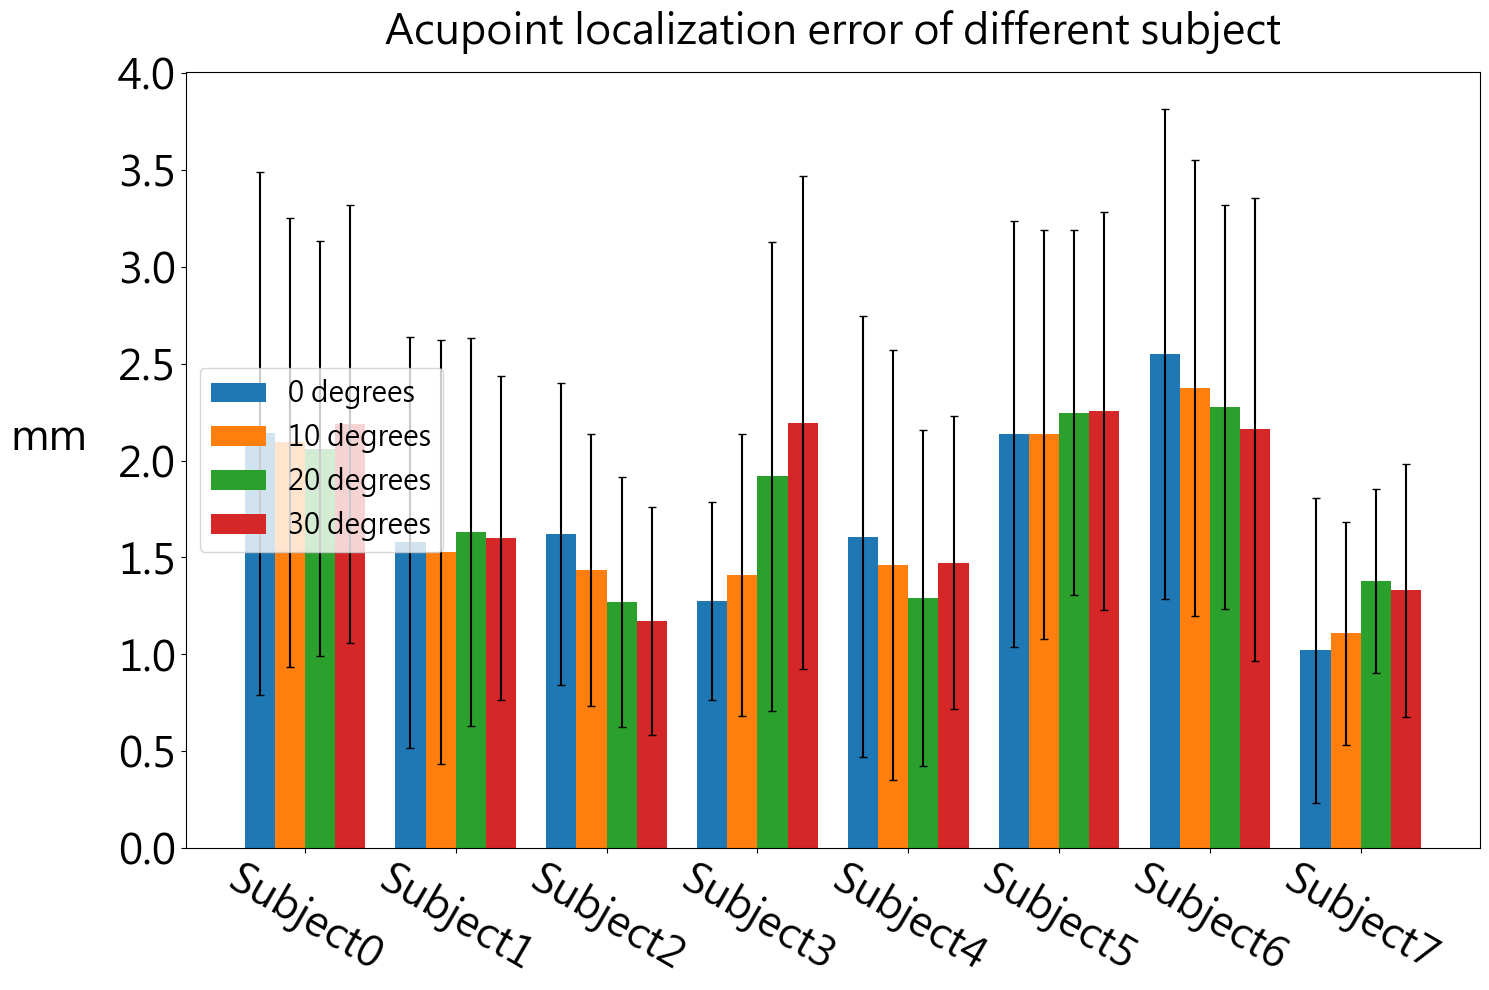

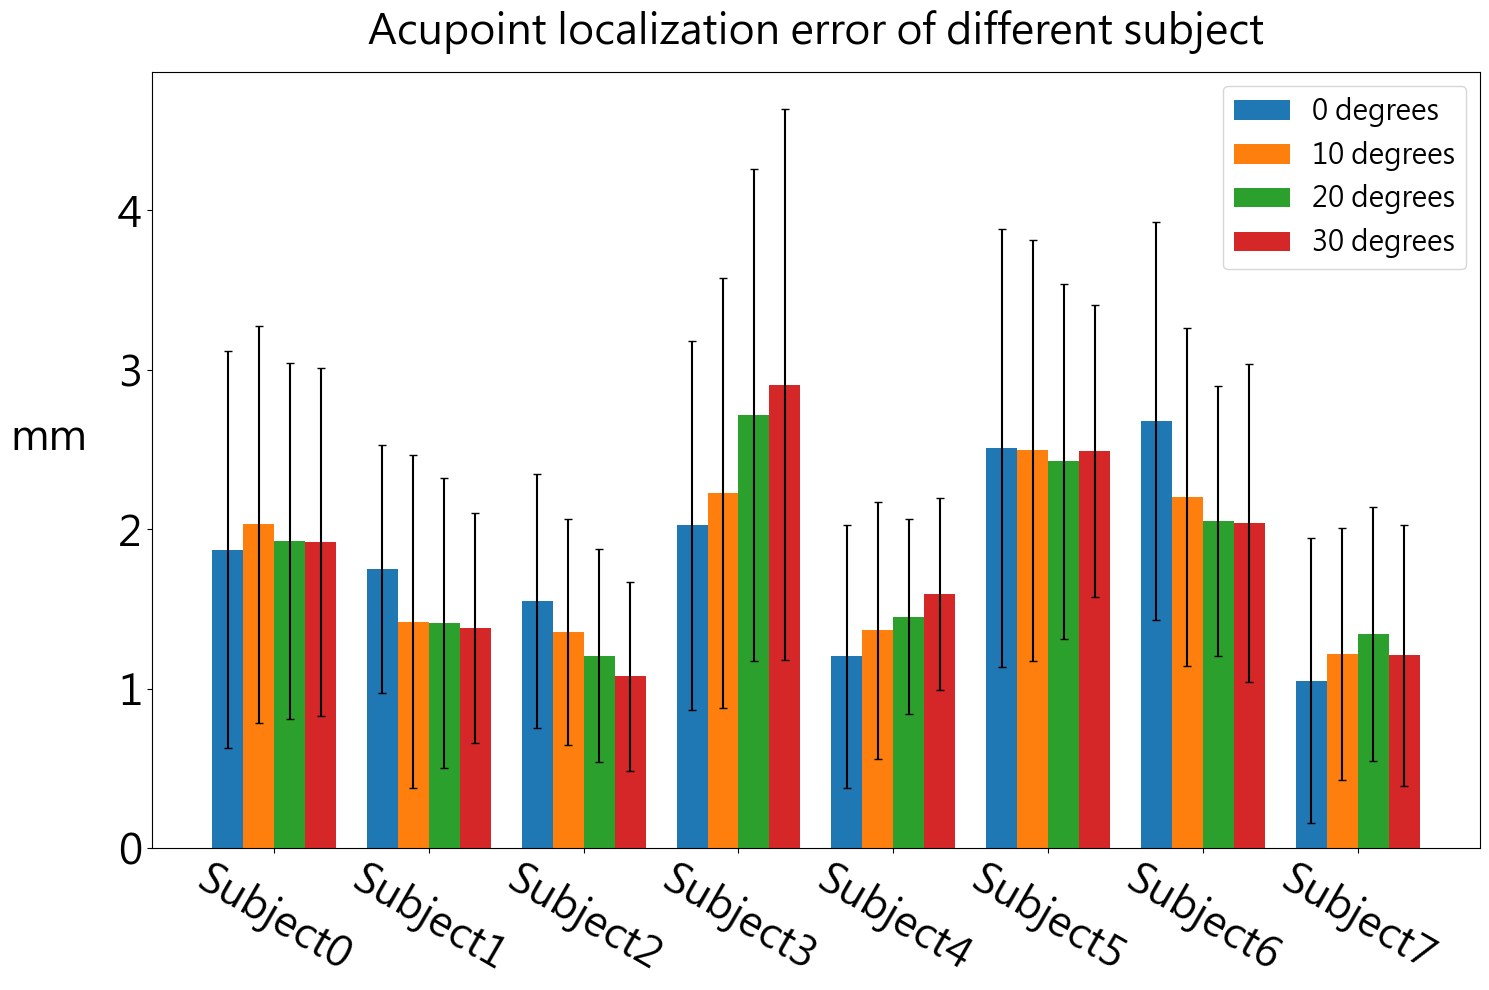

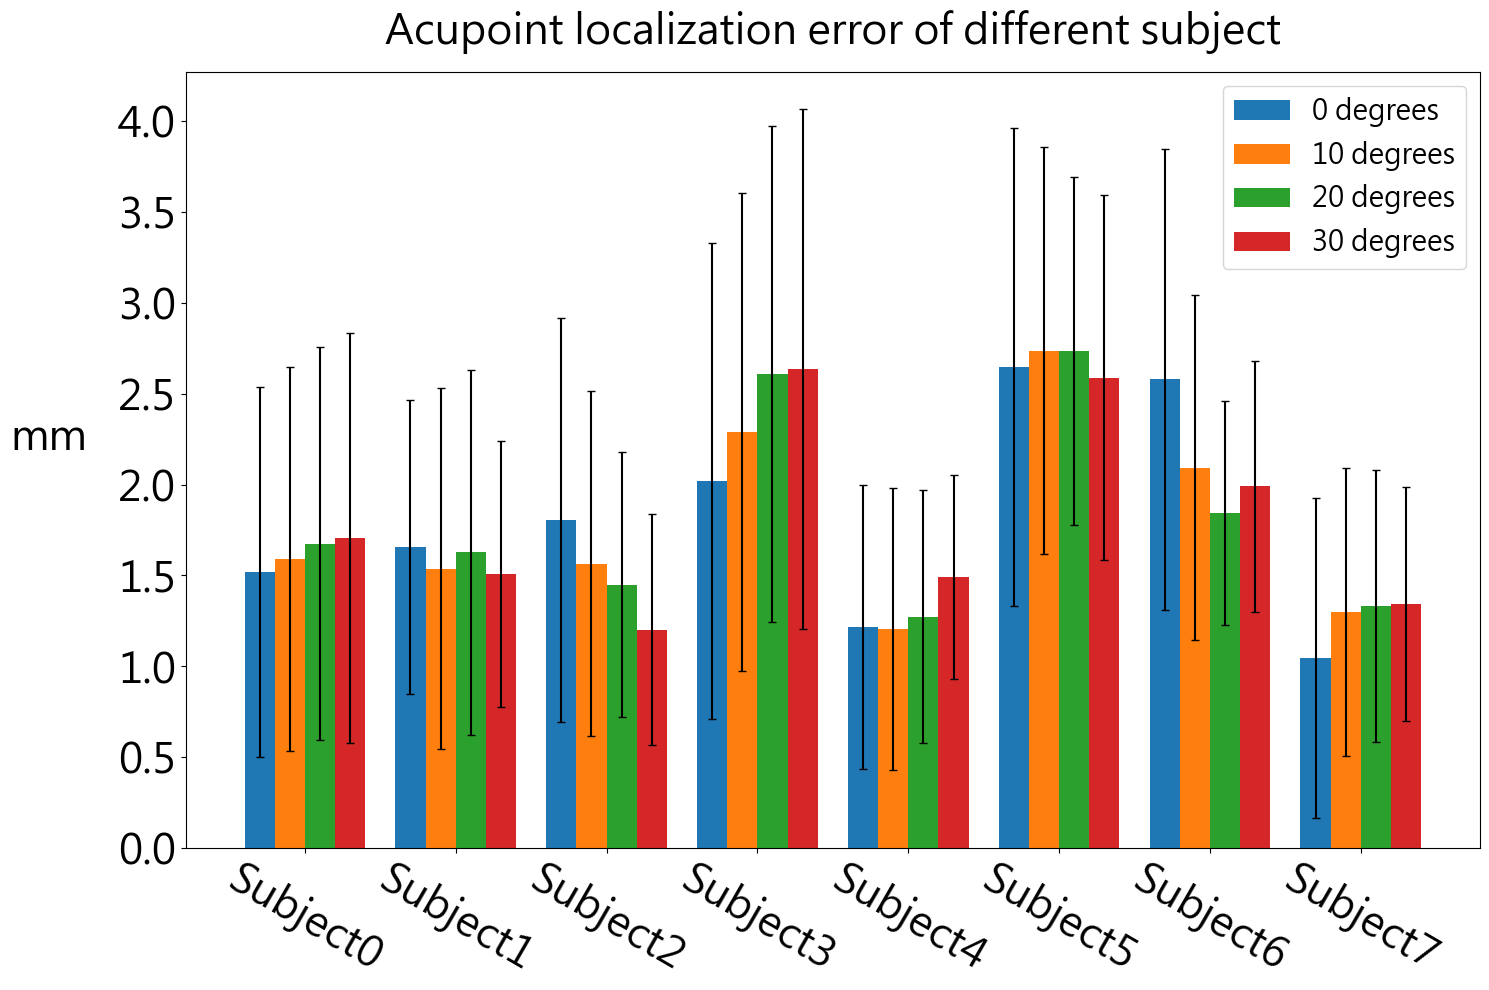

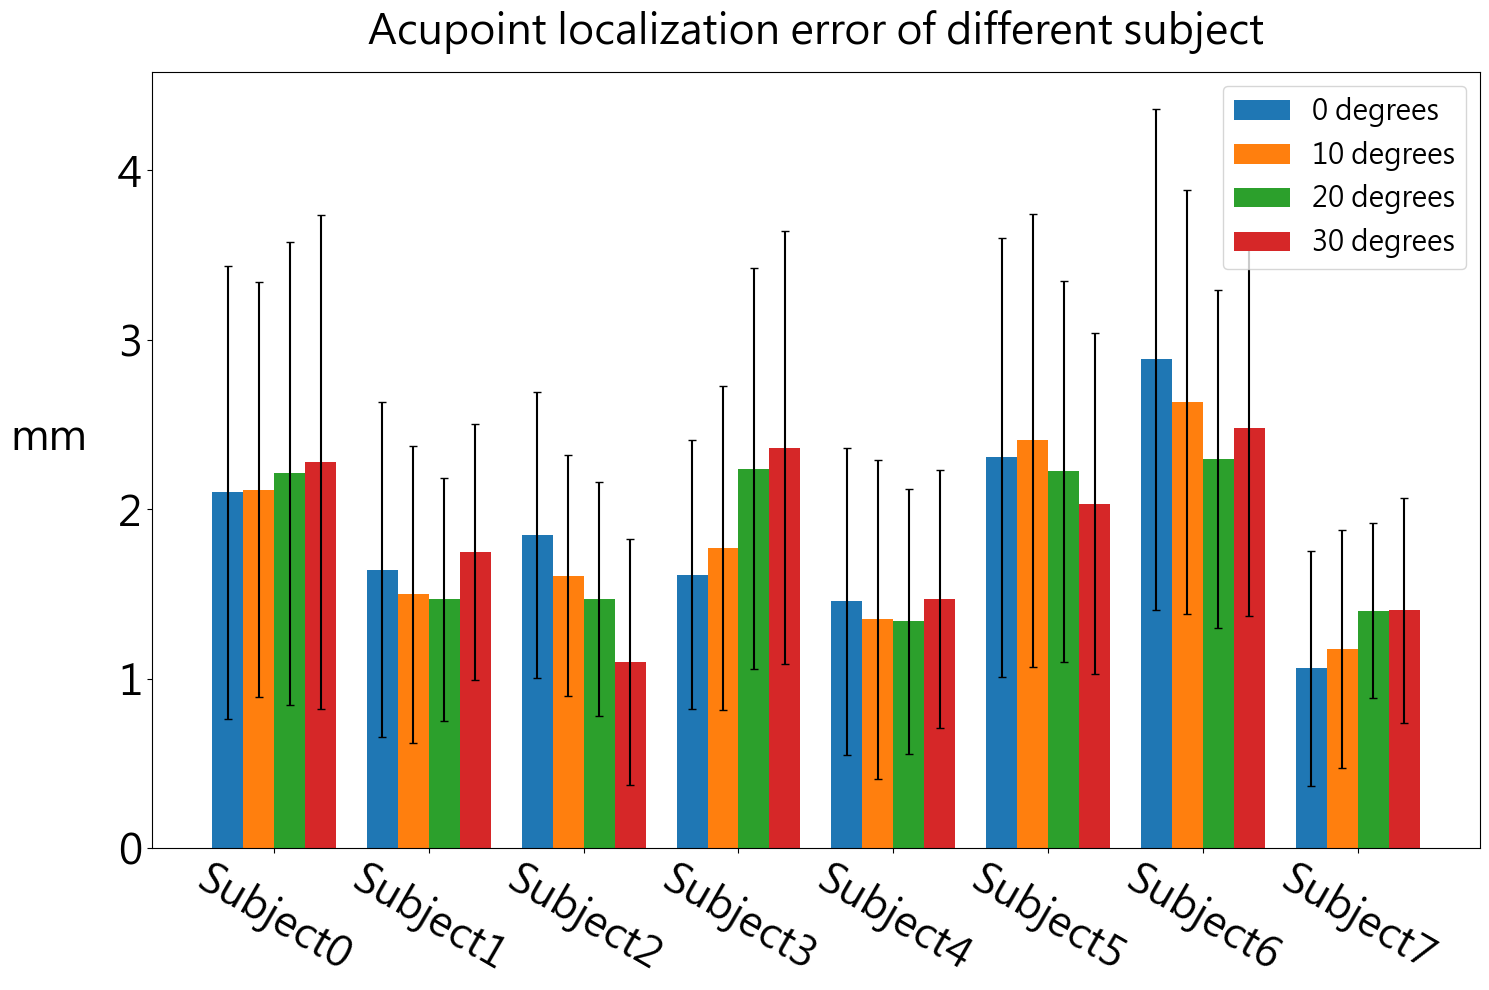

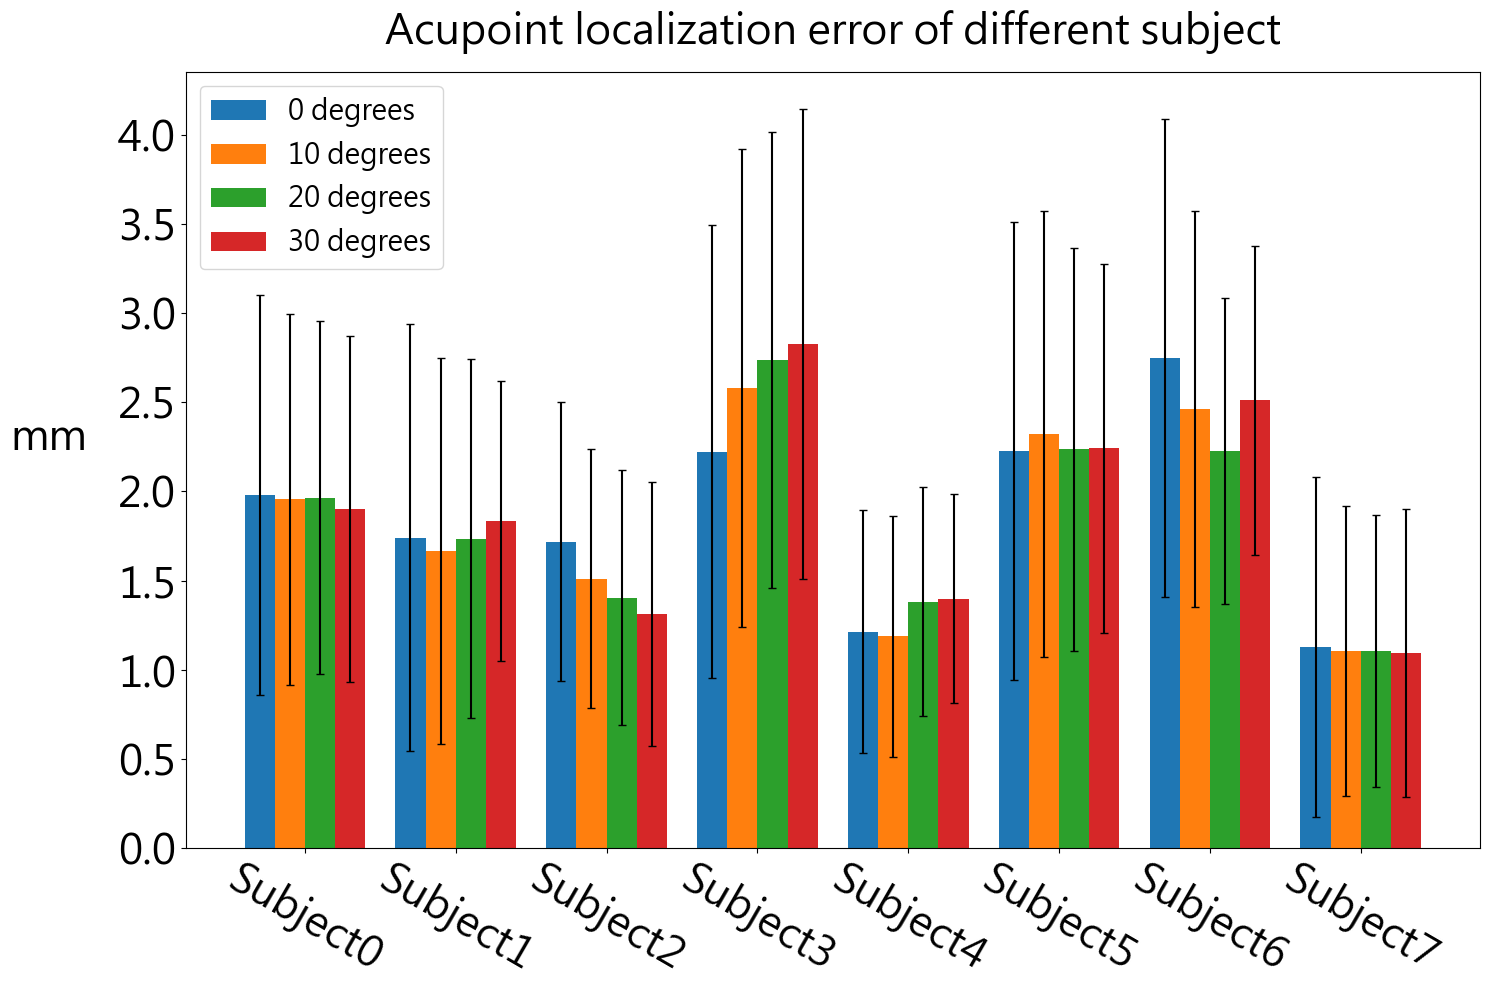

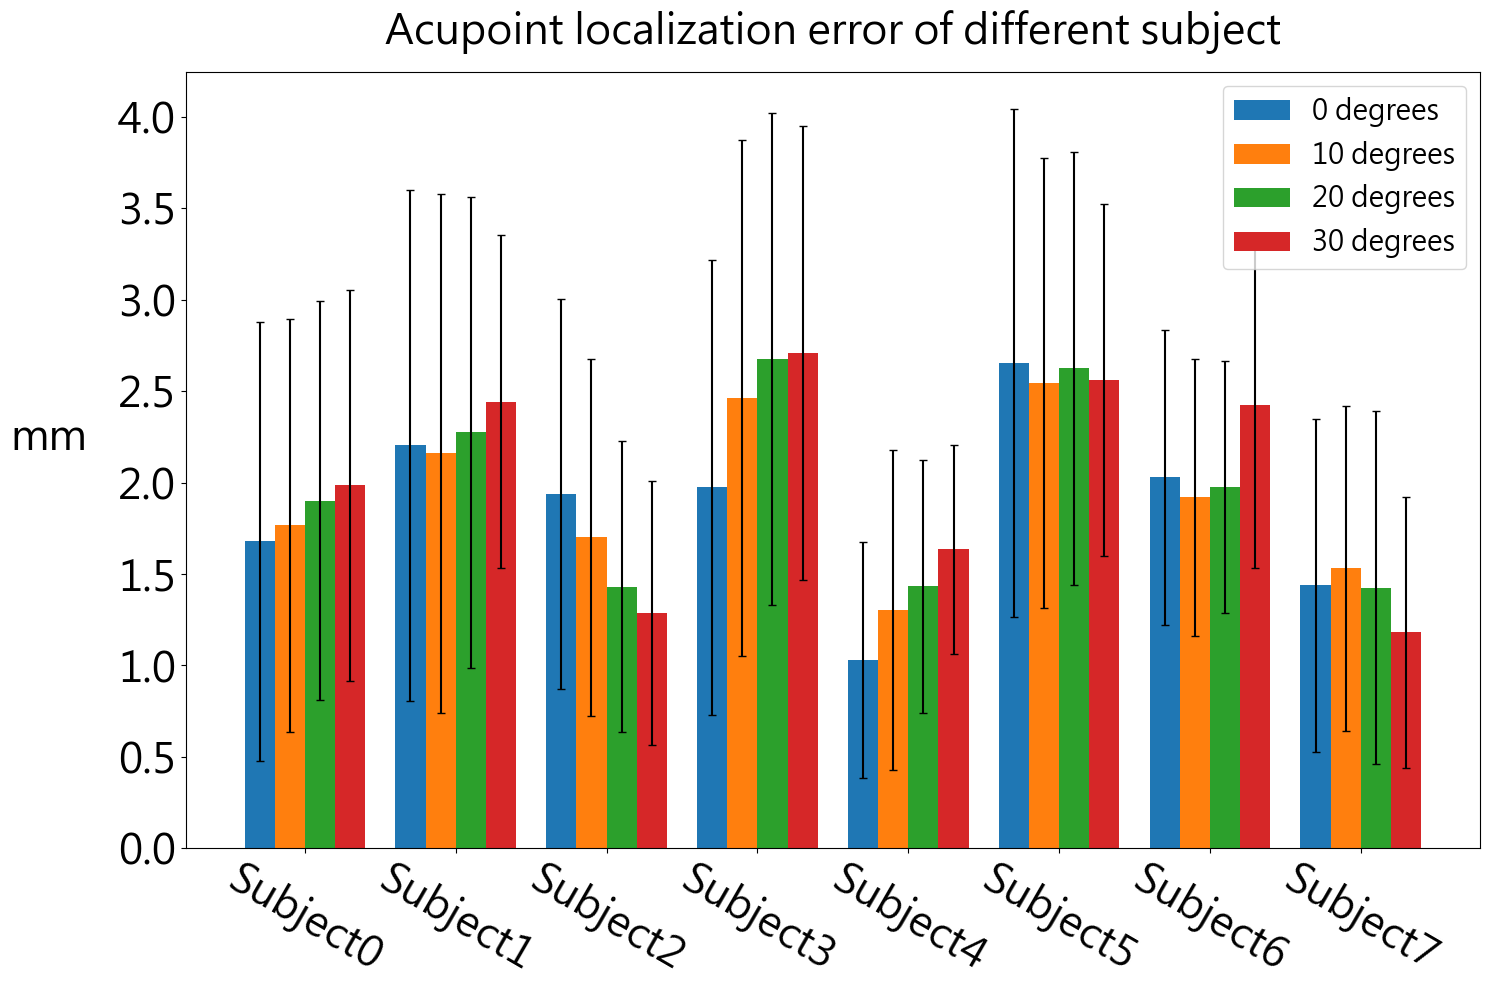

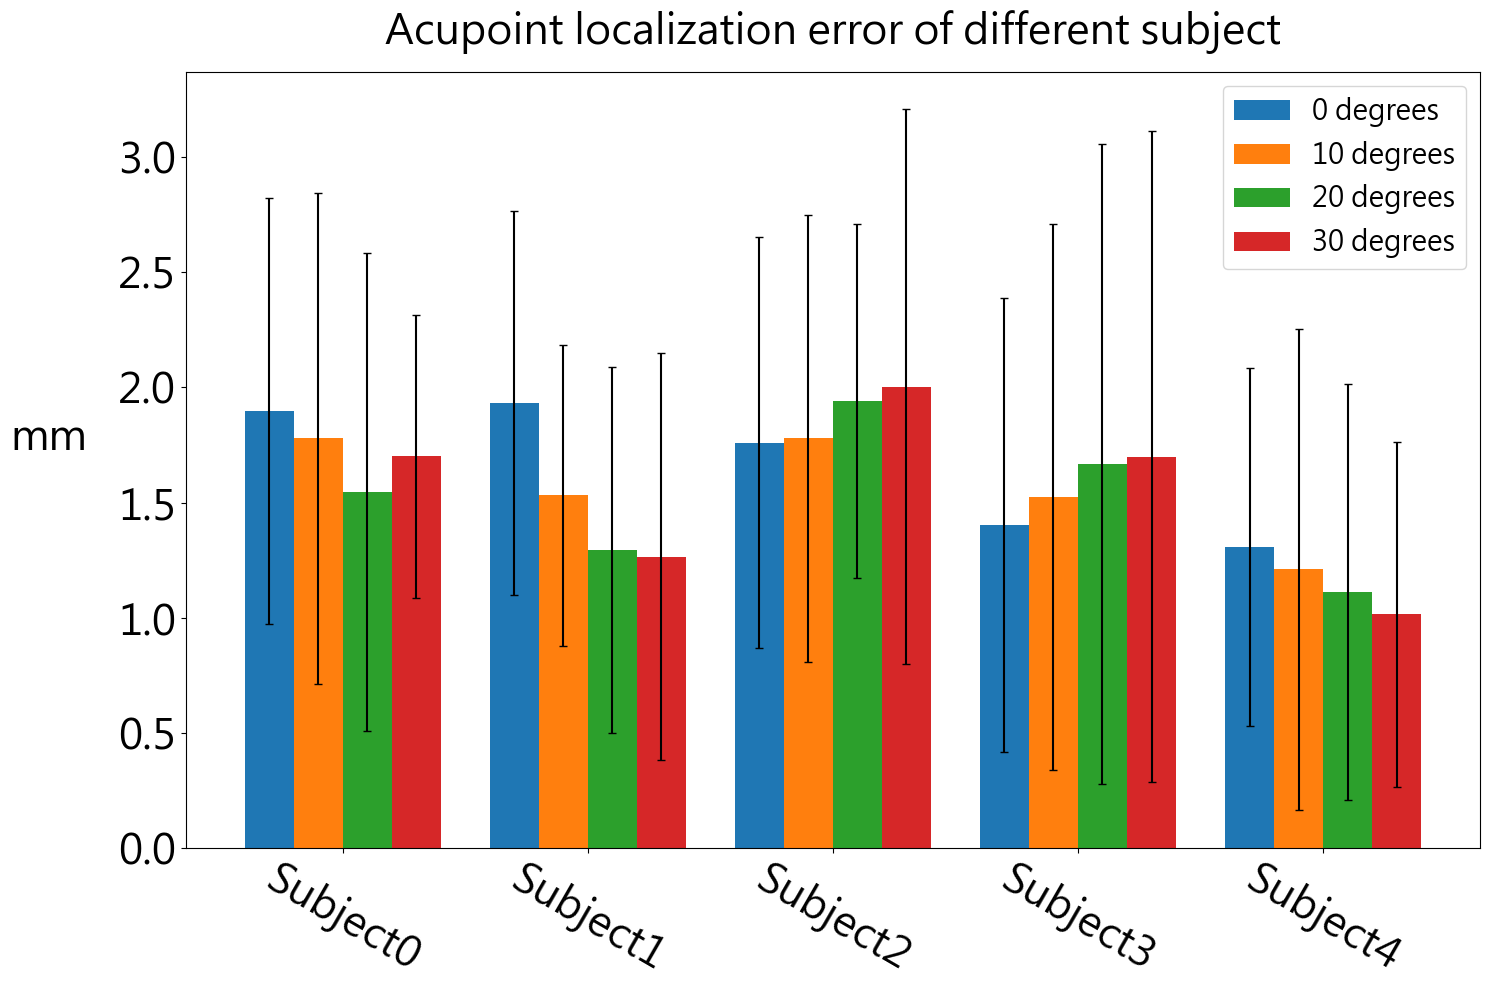

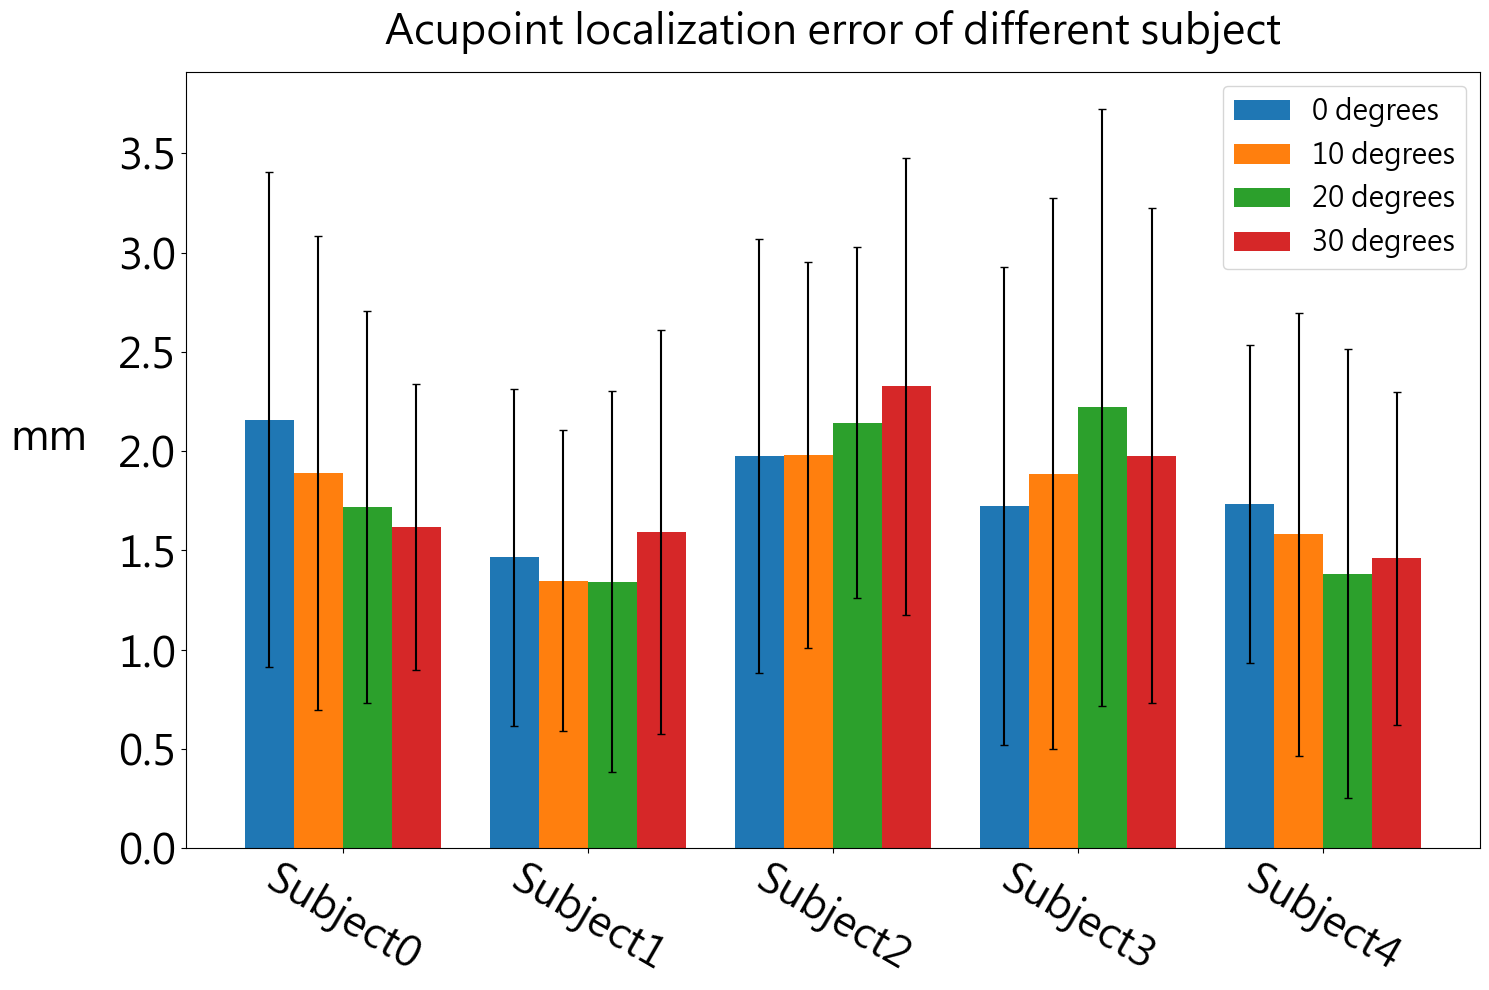

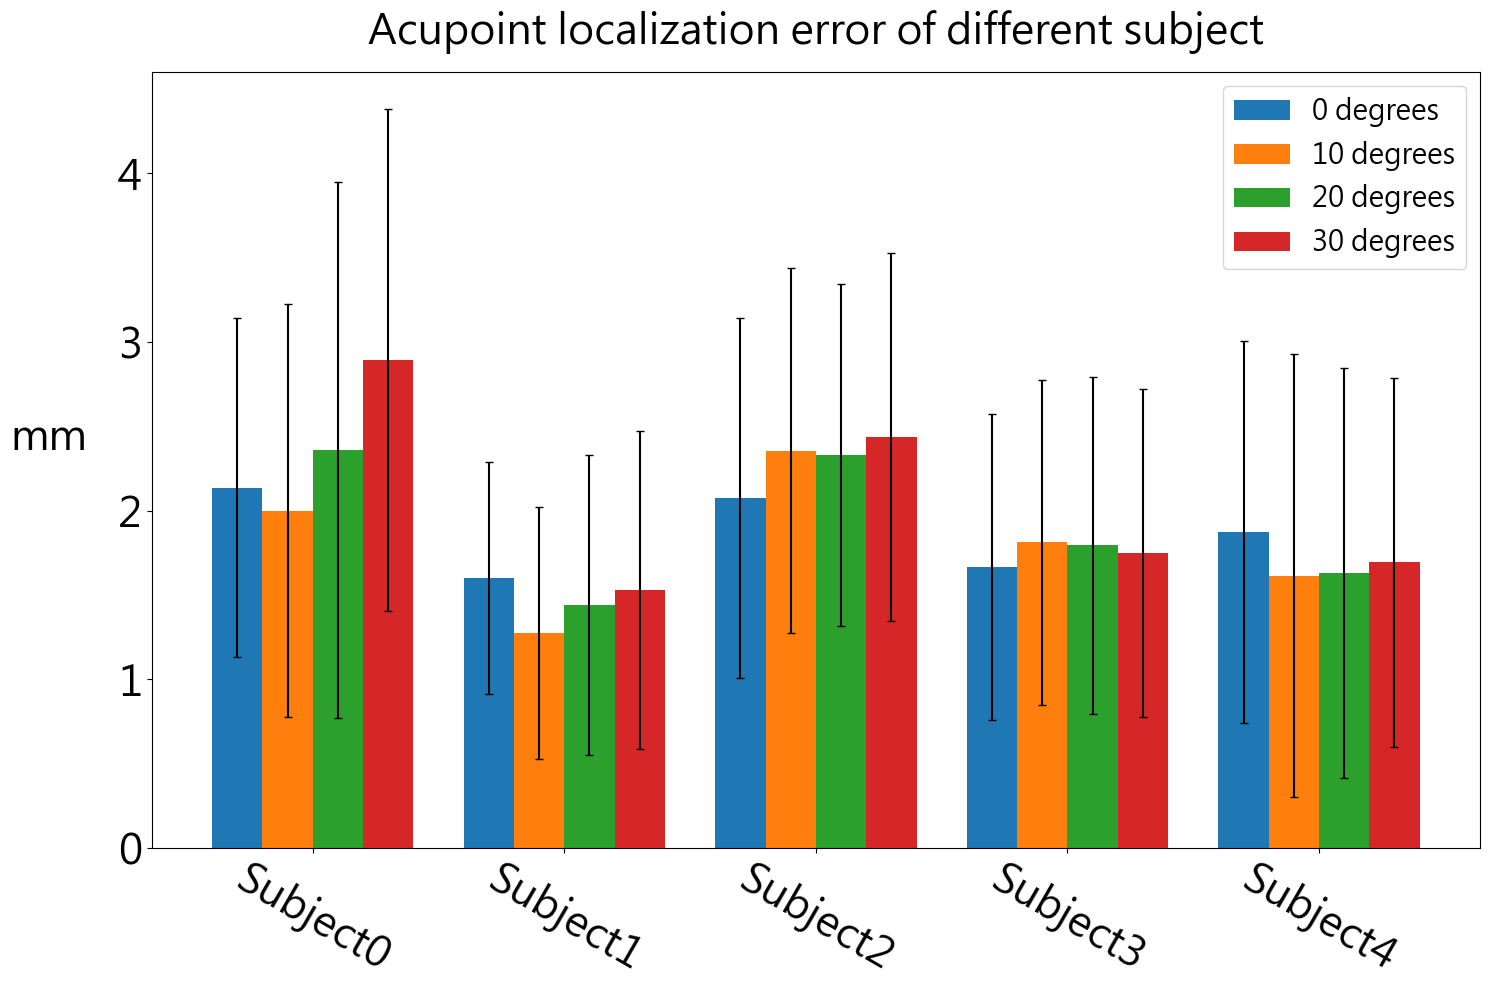

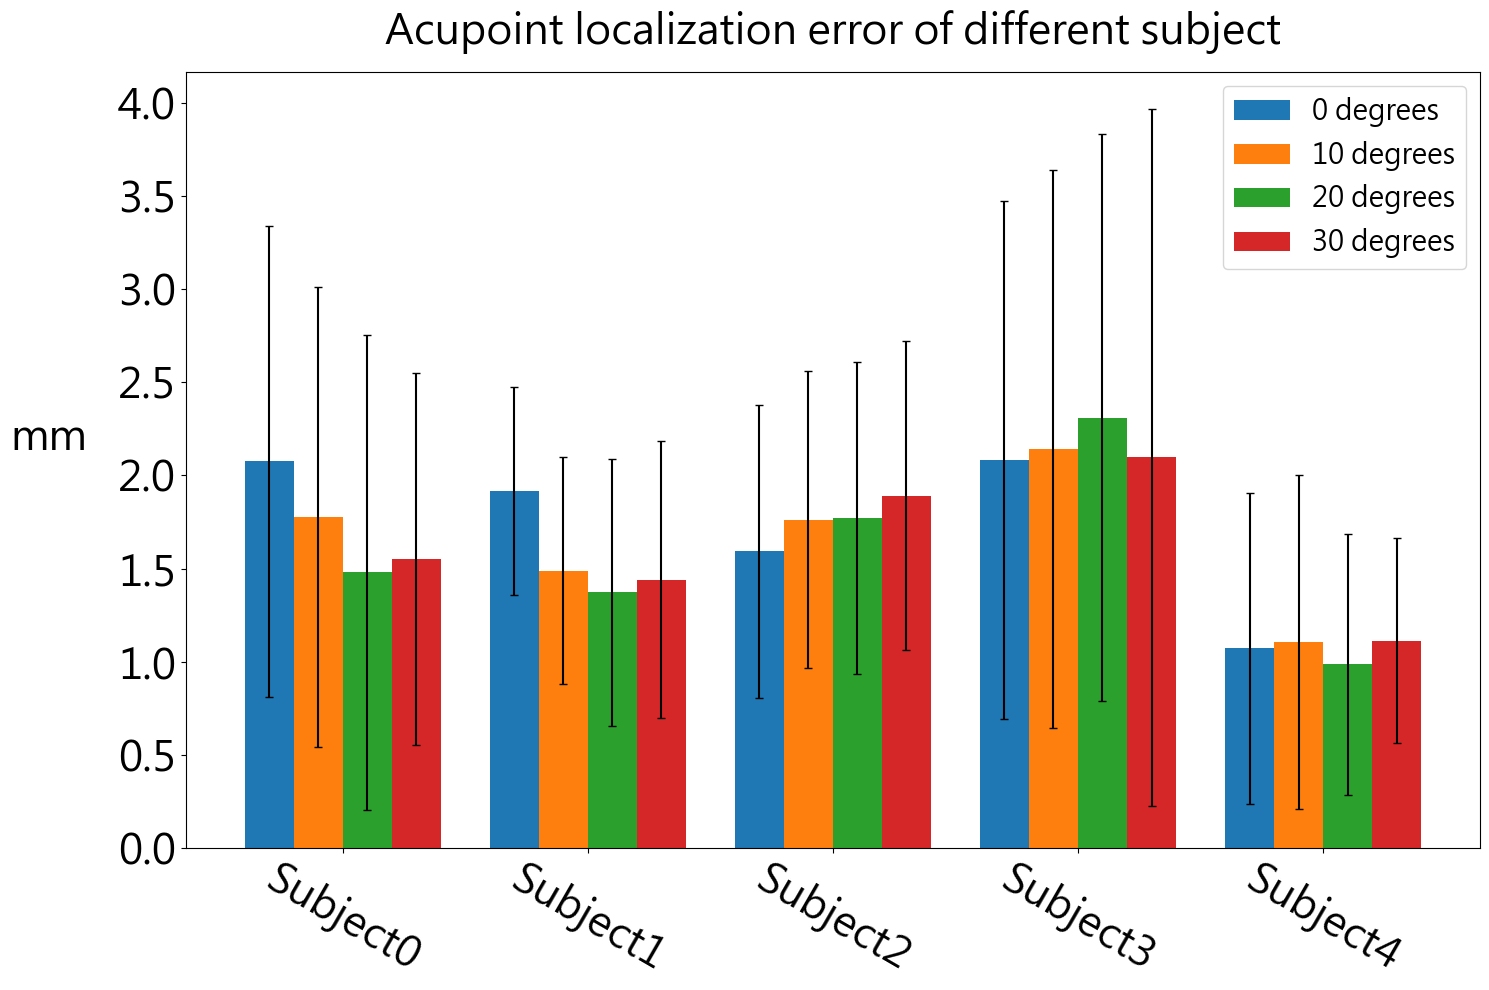

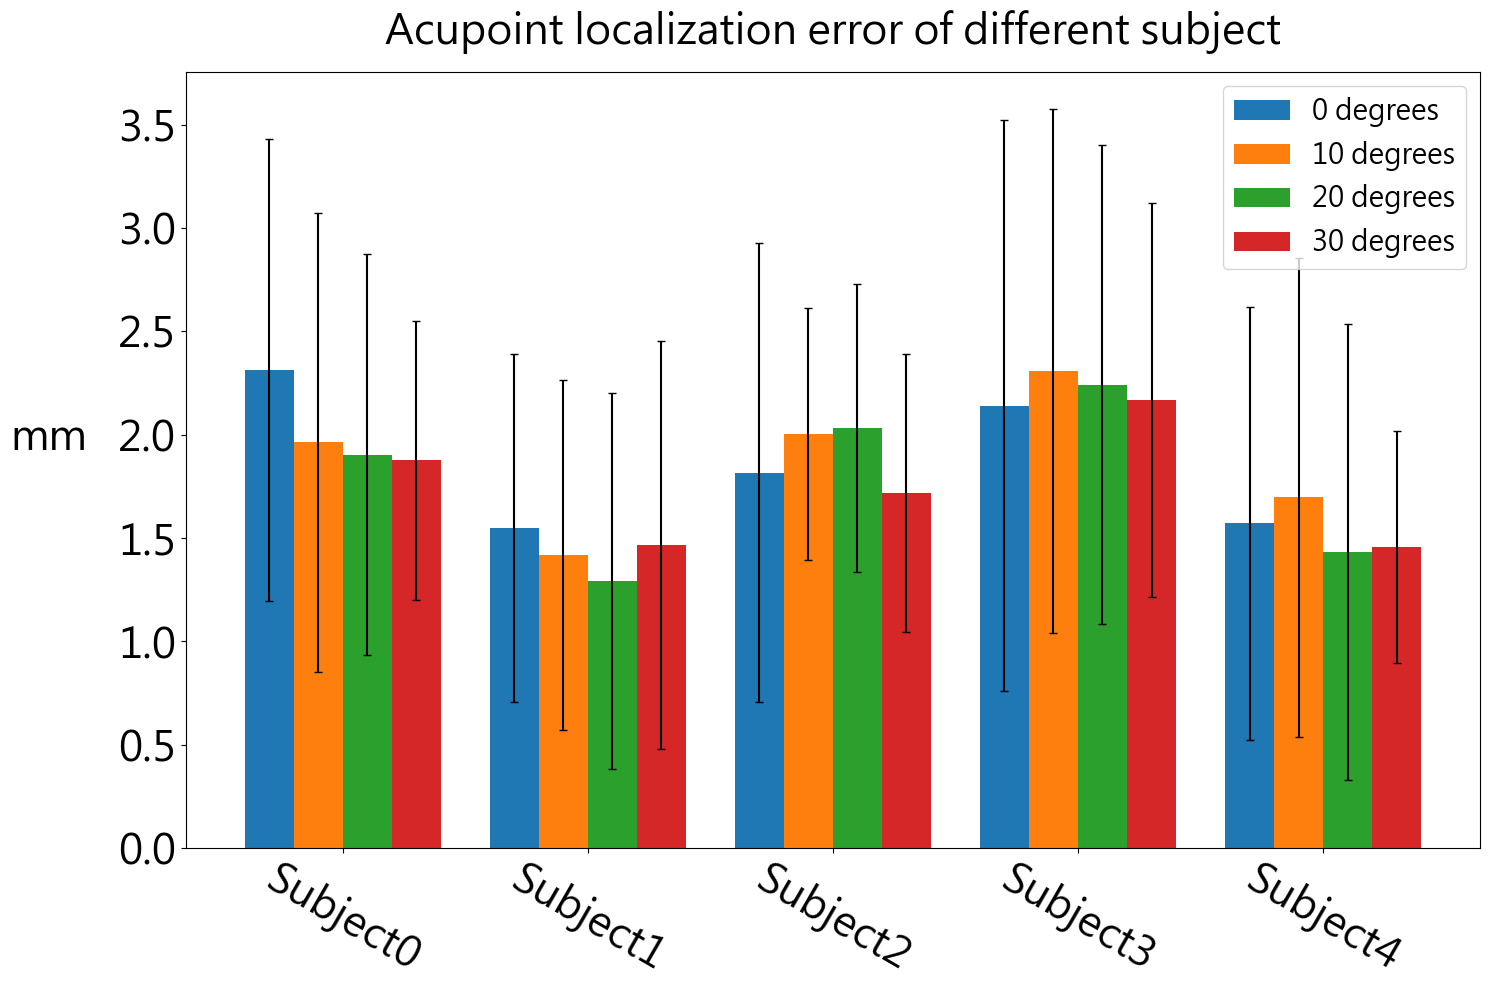

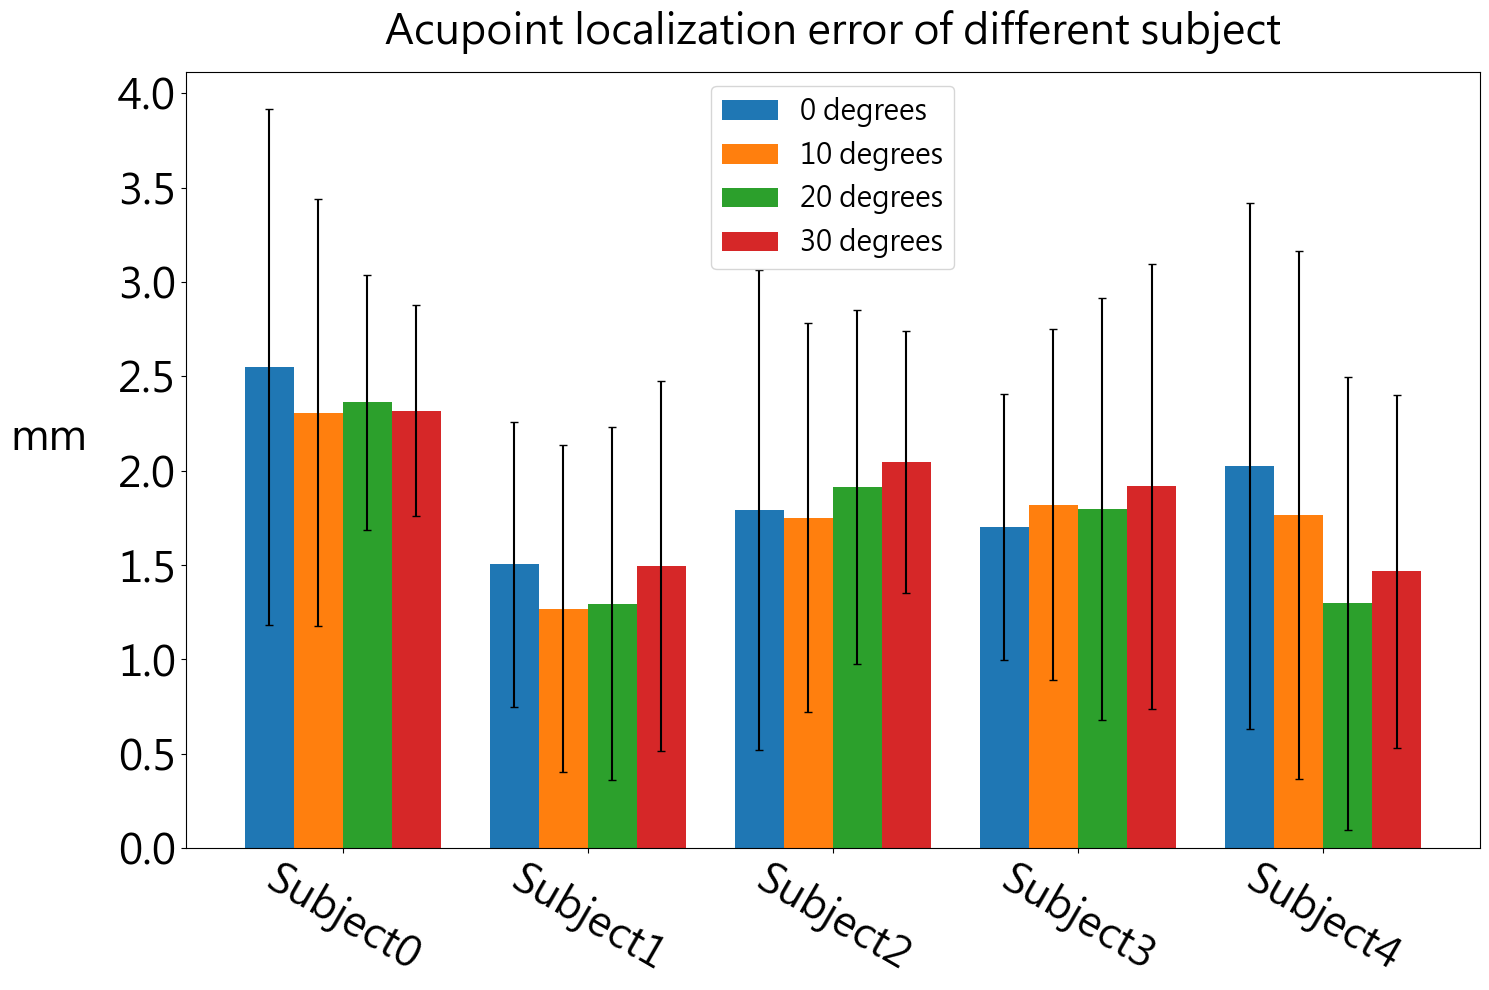

In [10]:
for ear_type in ear_types:
    if ear_type == "free":
        subjects_num = 8
    else:
        subjects_num = 5
    names = os.listdir(os.path.join(result, ear_type))
    for deg in degrees:
        angles_mean = []
        angles_std = []
        for i in range(0, 4):

            sum_eight_people = []

            for name in names:
                error_file = glob.glob(os.path.join(result, ear_type, name, "error",deg,"*.csv"))[0]
                error_df = pd.read_csv(error_file, index_col = 0)

                interval = len(error_df) / 3
                temp = list(range(len(error_df)))
                index = [temp[0]] + [temp[int(interval)]] + [temp[int(interval*2)]] +[temp[-1]]

                sum_eight_people.append(error_df.iloc[index[i],:].to_numpy())

            sum_eight_people = np.array(sum_eight_people)

            angles_mean.append(np.nanmean(sum_eight_people, axis=1)*10)
            angles_std.append(np.nanstd(sum_eight_people, axis=1)*10)

        plt.figure(figsize=(15,10))

        for l in range(0 ,len(angles_mean)):

            plt.bar(np.arange(subjects_num) + l*0.2, angles_mean[l], yerr=angles_std[l], align='center', label = '{index} degrees'.format(index = 0 + 10*l), ecolor='black', capsize=3, width=0.2)

        plt.ylabel('mm' , fontsize = 30, labelpad = 50, rotation = 0)

        plt.xticks(np.arange(subjects_num) + 0.3, ["Subject"+str(x) for x in list(range(0 , subjects_num))], fontsize=30, rotation=-30)


        plt.yticks(fontsize=30)
        plt.title('Acupoint localization error of different subject', fontsize = 30, pad = 20)

        plt.legend(fontsize=20)

        plt.tight_layout()
        if not os.path.isdir(os.path.join(figure, ear_type, deg)):
            os.makedirs(os.path.join(figure, ear_type, deg))
        plt.savefig(os.path.join(figure, ear_type, deg,'different subject.png').format(index = 0))
        plt.show()
        
    
    
        
        
                
        
        